In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt

# import seaborn as sns
# import seaborn.objects as so

# # extension patch by intel to speed up sklearn
# from sklearnex import patch_sklearn
# patch_sklearn()
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn import metrics
from sklearn.preprocessing import normalize, StandardScaler, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import statsmodels.api as sm
import statsmodels.genmod.families.links as links
from statsmodels.stats.mediation import Mediation
from scipy import stats

# init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
# configure pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# Input 0 or 1
* to indicate whether you want  to include dfm-dfm connectivity
* 0-no, 1-yes

In [2]:
home = 0
dfm_dfm = 0

In [3]:
if home:
    dpath = '/Users/cglab/projects/abcd/data/abcd5.1-rser/'
else:
    dpath = '/home/cglab/projects/abcd/data/abcd5.1-rser/'

In [4]:
if dfm_dfm:
    rsf = pd.read_csv(dpath + 'rsfmri_insula_emot_reg_ders_df-df_waves_id.csv')
else:
    rsf = pd.read_csv(dpath + 'rsfmri_insula_emot_reg_ders_waves_id.csv')
print(rsf.shape)
rsf.describe()

(22123, 113)


rsfmri_var_cdk_insulalh  rsfmri_var_cdk_insularh  rsfmri_var_cdk_rlaclatelh  rsfmri_var_cdk_rlaclaterh  rsfmri_var_cdk_entorhinallh  rsfmri_var_cdk_entorhinalrh  rsfmri_var_scs_amygdalalh  rsfmri_var_scs_amygdalarh  rsfmri_var_scs_hpuslh  rsfmri_var_scs_hpusrh  rsfmri_var_scs_putamenlh  rsfmri_var_scs_putamenrh  rsfmri_var_scs_tplh  rsfmri_var_scs_tprh  rsfmri_var_scs_ventraldclh  rsfmri_var_scs_ventraldcrh  rsfmri_var_scs_aalh  rsfmri_var_scs_aarh    mrirsfd121     mrirsfd48  \
count             22123.000000             22123.000000               22123.000000               22123.000000                 22119.000000                 22117.000000               22120.000000               22121.000000           22122.000000           22122.000000              22123.000000              22123.000000         22123.000000         22123.000000                22122.000000                22122.000000         22123.000000         22123.000000  22123.000000  22123.000000   
mean                  0.016252                 0.019486                   0.050931                   0.047161                     0.255551                     0.332234                   0.050596                   0.049172               0.027318               0.025767                  0.026990                  0.027316             0.013965             0.014712                    0.027898                    0.027644             0.091102             0.089206      0.051832      0.023236   
std                   0.009114                 0.015326                   0.040441                   0.036044                     0.548462                     0.719850                   0.069901                   0.070195               0.018367               0.017386                  0.014787                  0.017093             0.012072             0.013780                    0.025802                    0.027707             0.162160             0.164541      0.039292      0.019368   
min                   0.000123                 0.000116                   0.000657                   0.000562                     0.002267                     0.001478                   0.000142                   0.000449               0.000248               0.000232                  0.000230                  0.000563             0.000212             0.000079                    0.000226                    0.000457             0.003040             0.000824      0.001907      0.000759   
25%                   0.011090                 0.013284                   0.031932                   0.029654                     0.044347                     0.053302                   0.027278                   0.025243               0.018656               0.017476                  0.019077                  0.019253             0.008425             0.008763                    0.015613                    0.015331             0.040989             0.038521      0.033892      0.014841   
50%                   0.014629                 0.017618                   0.042891                   0.039559                     0.087871                     0.116479                   0.036858                   0.034360               0.023949               0.022355                  0.024601                  0.024774             0.011213             0.011799                    0.022087                    0.021696             0.053817             0.051048      0.045312      0.020066   
75%                   0.019410                 0.023411                   0.058584                   0.054124                     0.235679                     0.315127                   0.052679                   0.049960               0.031153               0.029180                  0.031886                  0.032189             0.015893             0.016761                    0.032616                    0.032022             0.079096             0.076569      0.061120      0.027675   
max                   0.601306                 1.714728                   2.065

In [5]:
rsf['rsfmri_c_ngd_sa_ngd_vta'].describe()

count    22109.000000
mean         0.076930
std          0.068127
min         -0.280655
25%          0.032563
50%          0.074671
75%          0.119513
max          0.835934
Name: rsfmri_c_ngd_sa_ngd_vta, dtype: float64

<Axes: ylabel='Frequency'>

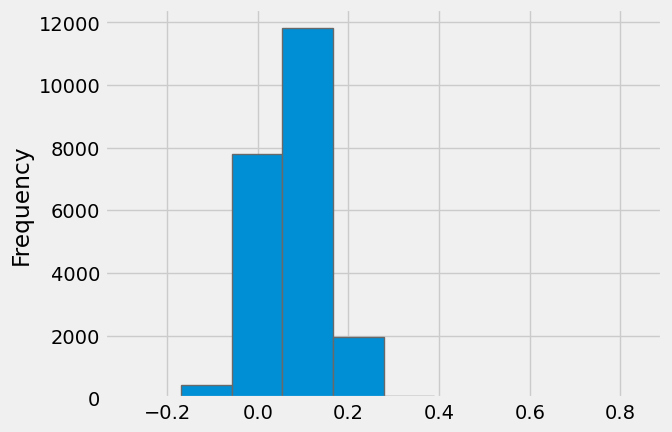

In [6]:
rsf['rsfmri_c_ngd_sa_ngd_vta'].plot.hist()

In [7]:
ca_std = rsf['rsfmri_c_ngd_sa_ngd_vta'].std()
ca_std

0.06812717045062797

In [8]:
rsf[rsf['src_subject_id']=='NDAR_INV00CY2MDM']

rsfmri_var_cdk_insulalh  rsfmri_var_cdk_insularh  rsfmri_var_cdk_rlaclatelh  rsfmri_var_cdk_rlaclaterh  rsfmri_var_cdk_entorhinallh  rsfmri_var_cdk_entorhinalrh    src_subject_id                 eventname  rsfmri_var_scs_amygdalalh  rsfmri_var_scs_amygdalarh  rsfmri_var_scs_hpuslh  rsfmri_var_scs_hpusrh  rsfmri_var_scs_putamenlh  rsfmri_var_scs_putamenrh  rsfmri_var_scs_tplh  rsfmri_var_scs_tprh  rsfmri_var_scs_ventraldclh  rsfmri_var_scs_ventraldcrh  rsfmri_var_scs_aalh  \
4                 0.016246                 0.012573                   0.033168                   0.040843                     0.111685                     0.065820  NDAR_INV00CY2MDM  2_year_follow_up_y_arm_1                   0.052184                   0.037029               0.021606               0.036169                  0.019490                   0.01730             0.009993             0.011925                    0.014280                    0.019273             0.085092   
5                 0.020025                 0.025712                   0.032919                   0.037755                     0.061269                     0.081587  NDAR_INV00CY2MDM  4_year_follow_up_y_arm_1                   0.039898                   0.028377               0.020381               0.032302                  0.016113                   0.01571             0.016677             0.017799                    0.023283                    0.019604             0.051957   
6                 0.017465                 0.020010                   0.025354                   0.026890                     0.078669                     0.086311  NDAR_INV00CY2MDM     baseline_year_1_arm_1                   0.071819                   0.033542               0.023092               0.021691                  0.016344                   0.01902             0.014159             0.016083                    0.037540                    0.032075             0.121050   

   rsfmri_var_scs_aarh  mrirsfd121  mrirsfd48  mrirsfd122  mrirsfd49  mrirsfd123  mrirsfd47  rsfmri_cor_ngd_sa_scs_aalh  rsfmri_cor_ngd_sa_scs_aarh  rsfmri_cor_ngd_sa_scs_aglh  rsfmri_cor_ngd_sa_scs_agrh  rsfmri_cor_ngd_sa_scs_bs  rsfmri_cor_ngd_sa_scs_cdelh  rsfmri_cor_ngd_sa_scs_cderh  rsfmri_cor_ngd_sa_scs_crcxlh  rsfmri_cor_ngd_sa_scs_crcxrh  rsfmri_cor_ngd_sa_scs_hplh  rsfmri_cor_ngd_sa_scs_hprh  rsfmri_cor_ngd_sa_scs_pllh  rsfmri_cor_ngd_sa_scs_plrh  rsfmri_cor_ngd_sa_scs_ptlh  \
4             0.051332    0.044525   0.024330    0.027256   0.039896    0.047019   0.060342                    0.087313                    0.032769                    0.106473                   -0.089008                  0.039110                    -0.045963                     0.054209                     -0.026604                     -0.132791                   -0.070338                    0.041616                    0.151400                    0.006462                    0.014982   
5             0.053124    0.099917   0.018607    0.023882   0.050096    0.058556   0.067077                    0.032736                   -0.019156                    0.037819                   -0.118584                  0.093603                     0.066322                     0.314207                      0.013684                     -0.069731                   -0.061999                   -0.066355                    0.047219                   -0.004290                   -0.021502   
6             0.085772    0.062151   0.019519    0.028857   0.027431    0.031052   0.043849                   -0.021938                    0.009371                    0.001774                   -0.113839                  0.066824                     0.176314                     0.162352                     -0.058645                     -0.193189                    0.048972                   -0.172117                   -0.061284                    0.109986                   -0.005143   

   rsfmri_cor_ngd_sa_scs_ptrh  rsfmri_cor_ngd_sa_scs_thplh  rsfmri_cor_ngd_sa_scs_thprh  rsfmri_cor_ngd_sa_sc

In [9]:
rsf['eventname'].value_counts()

eventname
baseline_year_1_arm_1       11219
2_year_follow_up_y_arm_1     7911
4_year_follow_up_y_arm_1     2993
Name: count, dtype: int64

In [11]:
rsf.isnull().any()

tfmri_nback_all_224            True
tfmri_nback_all_238            True
tfmrinbackallsem_224           True
tfmrinbackallsem_238           True
tfmri_nback_all_226            True
                              ...  
rsfmri_meanmotion              True
tfmri_nback_all_meanmotion    False
scanID                        False
imgincl_rsfmri_include        False
imgincl_nback_include         False
Length: 157, dtype: bool

### Select wave of interest - Baseline here

In [11]:
rsb = rsf[rsf['eventname'].isin(['baseline_year_1_arm_1', '2_year_follow_up_y_arm_1'])].copy()
print(rsb.shape)
rsb.isnull().any()

(19130, 113)


rsfmri_var_cdk_insulalh         False
rsfmri_var_cdk_insularh         False
rsfmri_var_cdk_rlaclatelh       False
rsfmri_var_cdk_rlaclaterh       False
rsfmri_var_cdk_entorhinallh      True
rsfmri_var_cdk_entorhinalrh      True
src_subject_id                  False
eventname                       False
rsfmri_var_scs_amygdalalh        True
rsfmri_var_scs_amygdalarh       False
rsfmri_var_scs_hpuslh           False
rsfmri_var_scs_hpusrh           False
rsfmri_var_scs_putamenlh        False
rsfmri_var_scs_putamenrh        False
rsfmri_var_scs_tplh             False
rsfmri_var_scs_tprh             False
rsfmri_var_scs_ventraldclh      False
rsfmri_var_scs_ventraldcrh      False
rsfmri_var_scs_aalh             False
rsfmri_var_scs_aarh             False
mrirsfd121                      False
mrirsfd48                       False
mrirsfd122                      False
mrirsfd49                       False
mrirsfd123                      False
mrirsfd47                       False
rsfmri_cor_n

In [12]:
rsb['eventname'].value_counts()

eventname
baseline_year_1_arm_1       11219
2_year_follow_up_y_arm_1     7911
Name: count, dtype: int64

#### Get column names for string and numeric columns

In [13]:
# categorical variables that should not be standardized
cols_stry = ['src_subject_id', 'scanID', 'imgincl_rsfmri_include', 'eventname', 'gender_cat', 'demo_gender_id_v2', 'demo_gender_id_v2_l', 'site_id_l', 'rel_family_id', 'rel_birth_id', 'school_id', 'district_id', 'interview_date', 'interview_age', 'visit_type']#, 'dersAWR_4_year_follow_up_y_arm_1', 'dersAWR_3_year_follow_up_y_arm_1']
cols_num = list(set(rsb.columns).difference(cols_stry))
print(len(cols_num))

99


#### Future: create readable label names for plots

In [14]:
names = pd.read_excel('abcd_tabs_vars_insula.xlsx')
names.head()

Table                     Variable                                        Description
0  mri_y_rsfmr_var_dsk      rsfmri_var_cdk_insulalh         Temporal variance in APARC ROI left-insula
1  mri_y_rsfmr_var_dsk      rsfmri_var_cdk_insularh        Temporal variance in APARC ROI right-insula
2  mri_y_rsfmr_var_dsk    rsfmri_var_cdk_rlaclatelh  Temporal variance in APARC ROI left-rostralant...
3  mri_y_rsfmr_var_dsk    rsfmri_var_cdk_rlaclaterh  Temporal variance in APARC ROI right-rostralan...
4  mri_y_rsfmr_var_dsk  rsfmri_var_cdk_entorhinallh     Temporal variance in APARC ROI left-entorhinal

In [15]:
rsb.shape

(19130, 113)

### Get Dummy column for gender for SEM and Machine learning

* 0-Female and 1-Male
* Drop Non-binary genders from baseline, since there are very few ~5 each

In [16]:
rsb.eventname.value_counts()

eventname
baseline_year_1_arm_1       11219
2_year_follow_up_y_arm_1     7911
Name: count, dtype: int64

In [17]:
# combine the 2 gender columns, they're both for baseline year 1. they each have nan where the other has data
rsb['gender'] = rsb[['demo_gender_id_v2', 'demo_gender_id_v2_l']].fillna('').sum(axis=1)
# rsb[['eventname', 'demo_gender_id_v2', 'demo_gender_id_v2_l', 'gender']]

# drop non-binary genders. REVISIT for other waves when thers more trans 
rsb = rsb.loc[rsb['gender'].isin(['Male', 'Female'])]
rsb.eventname.value_counts()

eventname
baseline_year_1_arm_1       11190
2_year_follow_up_y_arm_1     7842
Name: count, dtype: int64

In [18]:
# keep gender cateogrical variable for posterity
rsb['gender_cat'] = rsb['gender']
rs = pd.get_dummies(rsb, columns=['gender'])
# use male dummy column, so 0=Female and 1=Male
rs['gender_dum'] = rs['gender_Male']
# rs[['eventname', 'demo_gender_id_v2_l', 'gender', 'demo_gender_id_v2_Male', 'demo_gender_id_v2_Female']].head()
rs.drop(['gender_Male', 'gender_Female', 'demo_gender_id_v2_l'], axis=1, inplace=True)
rs.shape

(19032, 114)

### NOT used bc drops too many: Drop NaN from numeric IV

In [19]:
# rs = rs.dropna(subset=cols_num, axis=0)
# rs.shape

In [20]:
# rvar = rs[rs_var_nm].corr()
# rvar = df.where(np.triu(np.ones(df.shape)).astype(np.bool))

### Not used : it excluded too many & random forest is robust to outliers
* Remove outliers
* max values that far exceed the 75% quartile
* remove rows exceeding 3 SD

In [21]:
# rs = rs[rs.select_dtypes(include='number').apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]
# print(rs.shape)
# rs.describe()

<Axes: >

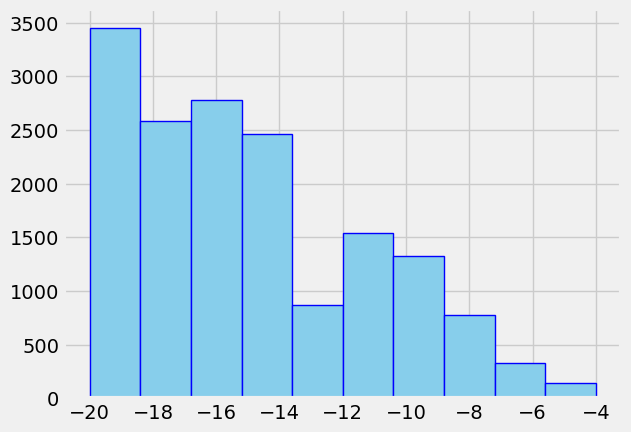

In [22]:
rs['ders_awareness_score_3_year'].hist(color='skyblue', edgecolor='blue')

array([[<Axes: title={'center': 'rsfmri_var_cdk_entorhinalrh'}>]],
      dtype=object)

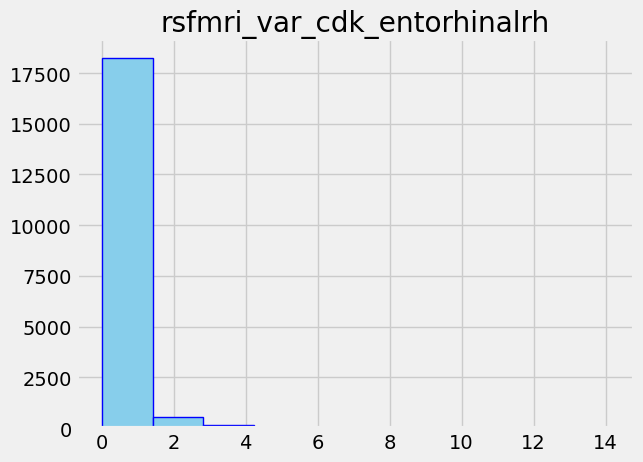

In [23]:
rs[rs.columns[5:7].tolist()].hist(color='skyblue', edgecolor='blue')

In [24]:
len(rs.columns[10:19].tolist())

9

array([[<Axes: title={'center': 'rsfmri_var_cdk_insulalh'}>,
        <Axes: title={'center': 'rsfmri_var_cdk_insularh'}>,
        <Axes: title={'center': 'rsfmri_var_cdk_rlaclatelh'}>,
        <Axes: title={'center': 'rsfmri_var_cdk_rlaclaterh'}>],
       [<Axes: title={'center': 'rsfmri_var_cdk_entorhinallh'}>,
        <Axes: title={'center': 'rsfmri_var_cdk_entorhinalrh'}>,
        <Axes: title={'center': 'rsfmri_var_scs_amygdalalh'}>,
        <Axes: title={'center': 'rsfmri_var_scs_amygdalarh'}>]],
      dtype=object)

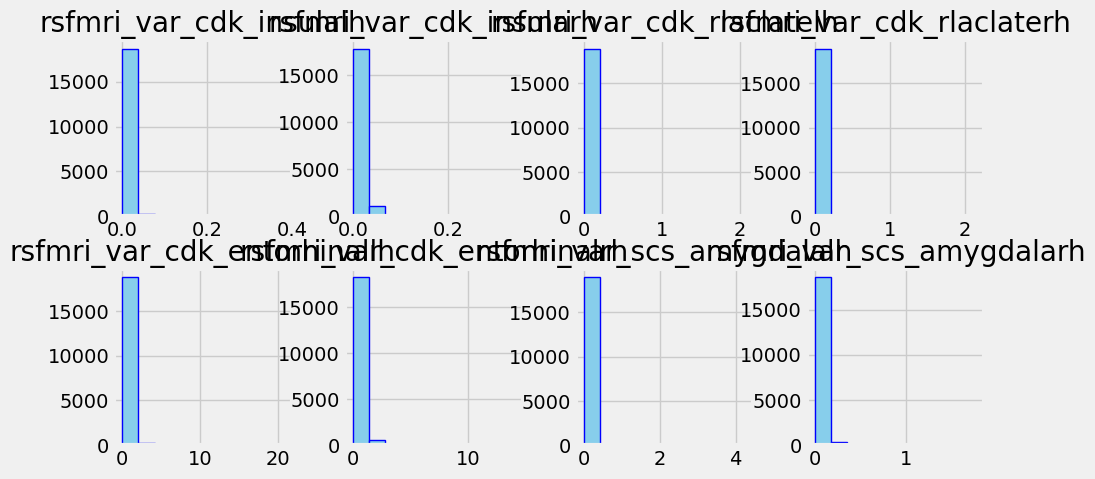

In [25]:
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
rs[rs.columns[:10].tolist()].hist(ax=ax, color='skyblue', edgecolor='blue')

### NOT used: ABCD network correlations are already Fisher-Z transformed

In [26]:
# corr_cols = [c for c in rs.columns if '_cor_' in c or '_c_' in c]
# rs[corr_cols] = np.arctan(rs[corr_cols])

In [27]:
rs.eventname.value_counts()

eventname
baseline_year_1_arm_1       11190
2_year_follow_up_y_arm_1     7842
Name: count, dtype: int64

### Compute combinations of Network conn

In [28]:
rs['rsfmri_c_sa_ngd_body'] = rs[['rsfmri_c_ngd_sa_ngd_ad', 'rsfmri_c_ngd_sa_ngd_smh', 'rsfmri_c_ngd_sa_ngd_smm']].mean(axis=1)

### Compute ratios of Network connectivity

In [29]:
dfm_nm = [d for d in cols_num if '_df_' in d]
sa_nm = [d for d in cols_num if '_sa_' in d]
year3_nm = [c for c in rs.columns if '3_year' in c]
year4_nm = [c for c in rs.columns if '4_year' in c]

In [30]:
len([c + '/' + j for c in dfm_nm for j in sa_nm])

608

In [31]:
# sa_den = ['rsfmri_cor_ngd_sa_scs_vtdclh', 'rsfmri_cor_ngd_sa_scs_vtdcrh', 'rsfmri_c_ngd_sa_ngd_sa', 'rsfmri_cor_ngd_sa_scs_thprh', 'rsfmri_cor_ngd_sa_scs_thplh', 'rsfmri_c_ngd_sa_ngd_cgc', 'rsfmri_c_ngd_sa_ngd_vta']
# dfm_num = ['rsfmri_cor_ngd_df_scs_vtdclh', 'rsfmri_cor_ngd_df_scs_vtdcrh', 'rsfmri_cor_ngd_df_scs_aglh', 'rsfmri_cor_ngd_df_scs_thprh', 'rsfmri_cor_ngd_df_scs_thplh', 'rsfmri_cor_ngd_df_scs_aalh', 'rsfmri_cor_ngd_df_scs_hplh']  

if dfm_dfm:
    sa_num = ['rsfmri_cor_ngd_sa_scs_vtdclh', 'rsfmri_cor_ngd_sa_scs_vtdcrh', 'rsfmri_c_ngd_sa_ngd_sa', 'rsfmri_cor_ngd_sa_scs_thprh', 'rsfmri_cor_ngd_sa_scs_thplh', 'rsfmri_c_ngd_sa_ngd_cgc', 'rsfmri_c_ngd_sa_ngd_dla', 'rsfmri_c_ngd_sa_ngd_rspltp', 'rsfmri_c_ngd_sa_ngd_vta', 'rsfmri_cor_ngd_sa_scs_aglh', 'rsfmri_cor_ngd_sa_scs_agrh', 'rsfmri_cor_ngd_sa_scs_aalh', 'rsfmri_cor_ngd_sa_scs_aarh', 'rsfmri_cor_ngd_sa_scs_ptlh', 'rsfmri_cor_ngd_sa_scs_ptrh']
    dfm_den = ['rsfmri_cor_ngd_df_scs_vtdclh', 'rsfmri_cor_ngd_df_scs_vtdcrh', 'rsfmri_c_ngd_dt_ngd_dt', 'rsfmri_cor_ngd_df_scs_thprh', 'rsfmri_cor_ngd_df_scs_thplh', 'rsfmri_c_ngd_dt_ngd_cgc', 'rsfmri_c_ngd_dt_ngd_dla', 'rsfmri_c_ngd_dt_ngd_rspltp', 'rsfmri_c_ngd_dt_ngd_vta', 'rsfmri_cor_ngd_df_scs_aglh', 'rsfmri_cor_ngd_df_scs_agrh', 'rsfmri_cor_ngd_df_scs_aalh', 'rsfmri_cor_ngd_df_scs_aarh', 'rsfmri_cor_ngd_df_scs_ptlh', 'rsfmri_cor_ngd_df_scs_ptrh']
else:
    sa_num = ['rsfmri_cor_ngd_sa_scs_cdelh', 'rsfmri_cor_ngd_sa_scs_cderh', 'rsfmri_cor_ngd_sa_scs_vtdclh', 'rsfmri_cor_ngd_sa_scs_vtdcrh', 'rsfmri_c_ngd_sa_ngd_sa', 'rsfmri_cor_ngd_sa_scs_thprh', 'rsfmri_cor_ngd_sa_scs_thplh', 'rsfmri_cor_ngd_sa_scs_aglh', 'rsfmri_cor_ngd_sa_scs_agrh', 'rsfmri_cor_ngd_sa_scs_aalh', 'rsfmri_cor_ngd_sa_scs_aarh', 'rsfmri_cor_ngd_sa_scs_ptlh', 'rsfmri_cor_ngd_sa_scs_ptrh', 'rsfmri_c_ngd_sa_ngd_cgc', 'rsfmri_c_ngd_sa_ngd_cgc_2', 'rsfmri_c_ngd_sa_ngd_cgc_3', 'rsfmri_c_ngd_sa_ngd_cgc_4', 'rsfmri_c_sa_ngd_body']
    dfm_den = ['rsfmri_cor_ngd_df_scs_cdelh', 'rsfmri_cor_ngd_df_scs_cderh', 'rsfmri_cor_ngd_df_scs_vtdclh', 'rsfmri_cor_ngd_df_scs_vtdcrh', 'rsfmri_c_ngd_sa_ngd_rspltp', 'rsfmri_cor_ngd_df_scs_thprh', 'rsfmri_cor_ngd_df_scs_thplh', 'rsfmri_cor_ngd_df_scs_aglh', 'rsfmri_cor_ngd_df_scs_agrh', 'rsfmri_cor_ngd_df_scs_aalh', 'rsfmri_cor_ngd_df_scs_aarh', 'rsfmri_cor_ngd_df_scs_ptlh', 'rsfmri_cor_ngd_df_scs_ptrh', 'rsfmri_c_ngd_sa_ngd_smh', 'rsfmri_c_ngd_sa_ngd_ad', 'rsfmri_c_ngd_sa_ngd_vta', 'rsfmri_c_ngd_sa_ngd_smm', 'rsfmri_c_ngd_sa_ngd_dla']

# rsfmri_cor_ngd_df_scs_aglh, 'rsfmri_cor_ngd_df_scs_aalh', 'rsfmri_cor_ngd_df_scs_hplh'
dfm_sa = ['/'.join([s,d]) for s, d in zip(sa_num, dfm_den)]
dfm_sa_sh = ['sa_dfm_' + str(i) for i, d in enumerate(dfm_sa)]
len(dfm_sa)

18

In [32]:
# calculate ratios
# set index as multi-index of 'src_subject_id' and 'eventname', to aid merge below
if 'src_subject_id' and 'eventname' in rs.columns:
    rs.set_index(['src_subject_id', 'eventname'], inplace=True)
# duplicate column 'rsfmri_c_ngd_sa_ngd_cgc' for division below to asign diff name
# otherwise after division column name is duplicated bc it outputs the numerate column name 
rs['rsfmri_c_ngd_sa_ngd_cgc_2'] = rs['rsfmri_c_ngd_sa_ngd_cgc']
rs['rsfmri_c_ngd_sa_ngd_cgc_3'] = rs['rsfmri_c_ngd_sa_ngd_cgc']
rs['rsfmri_c_ngd_sa_ngd_cgc_4'] = rs['rsfmri_c_ngd_sa_ngd_cgc']
# by column, divide each variable by others, e.g., sa_df/sa_fp
net_ratio = rs[sa_num].div(rs[dfm_den].values)
cols_dict = dict(zip(net_ratio.columns, dfm_sa))
net_ratio.rename(columns=cols_dict, inplace=True)
# # replace nan with 0 for missing
# net_ratio.fillna(0, inplace=True)
# merge shot percentages df with main nba df
rs = rs.merge(net_ratio, left_index=True, right_index=True)
rs.reset_index(inplace=True)
rs.drop(columns=['rsfmri_c_ngd_sa_ngd_cgc_2', 'rsfmri_c_ngd_sa_ngd_cgc_3', 'rsfmri_c_ngd_sa_ngd_cgc_4'], inplace=True)
rs.head()

src_subject_id                 eventname  rsfmri_var_cdk_insulalh  rsfmri_var_cdk_insularh  rsfmri_var_cdk_rlaclatelh  rsfmri_var_cdk_rlaclaterh  rsfmri_var_cdk_entorhinallh  rsfmri_var_cdk_entorhinalrh  rsfmri_var_scs_amygdalalh  rsfmri_var_scs_amygdalarh  rsfmri_var_scs_hpuslh  rsfmri_var_scs_hpusrh  rsfmri_var_scs_putamenlh  rsfmri_var_scs_putamenrh  rsfmri_var_scs_tplh  rsfmri_var_scs_tprh  rsfmri_var_scs_ventraldclh  rsfmri_var_scs_ventraldcrh  rsfmri_var_scs_aalh  \
0  NDAR_INV003RTV85     baseline_year_1_arm_1                 0.032260                 0.052060                   0.071868                   0.052642                     0.078200                     0.080552                   0.033267                   0.027442               0.051209               0.032869                  0.024650                  0.021586             0.010301             0.010871                    0.029412                    0.024803             0.054880   
1  NDAR_INV005V6D2C     baseline_year_1_arm_1                 0.013590                 0.012886                   0.027370                   0.034198                     0.362633                     0.380730                   0.069349                   0.069791               0.030952               0.053532                  0.020978                  0.033138             0.020319             0.038133                    0.023054                    0.052874             0.044784   
2  NDAR_INV007W6H7B     baseline_year_1_arm_1                 0.011214                 0.018393                   0.039584                   0.051270                     0.103505                     0.159625                   0.041240                   0.045538               0.017334               0.015613                  0.017352                  0.022719             0.007388             0.011355                    0.018350                    0.016273             0.050141   
3  NDAR_INV00BD7VDC     baseline_year_1_arm_1                 0.009826                 0.016295                   0.070756                   0.053926                     2.168501                     1.651751                   0.127942                   0.061222               0.070001               0.043119                  0.025548                  0.019388             0.012604             0.014131                    0.018402                    0.039716             0.043913   
4  NDAR_INV00CY2MDM  2_year_follow_up_y_arm_1                 0.016246                 0.012573                   0.033168                   0.040843                     0.111685                     0.065820                   0.052184                   0.037029               0.021606               0.036169                  0.019490                  0.017300             0.009993             0.011925                    0.014280                    0.019273             0.085092   

   rsfmri_var_scs_aarh  mrirsfd121  mrirsfd48  mrirsfd122  mrirsfd49  mrirsfd123  mrirsfd47  rsfmri_cor_ngd_sa_scs_aalh  rsfmri_cor_ngd_sa_scs_aarh  rsfmri_cor_ngd_sa_scs_aglh  rsfmri_cor_ngd_sa_scs_agrh  rsfmri_cor_ngd_sa_scs_bs  rsfmri_cor_ngd_sa_scs_cdelh  rsfmri_cor_ngd_sa_scs_cderh  rsfmri_cor_ngd_sa_scs_crcxlh  rsfmri_cor_ngd_sa_scs_crcxrh  rsfmri_cor_ngd_sa_scs_hplh  rsfmri_cor_ngd_sa_scs_hprh  rsfmri_cor_ngd_sa_scs_pllh  rsfmri_cor_ngd_sa_scs_plrh  rsfmri_cor_ngd_sa_scs_ptlh  \
0             0.041805    0.069081   0.031544    0.035615   0.102578    0.144333   0.106124                    0.161526                    0.231572                    0.175114                   -0.104169                 -0.050657                     0.118217                     0.414630                      0.069444                     -0.113659                   -0.274035                   -0.062580                   -0.082889                    0.096238                   -0.029626   
1             0.053350    0.050878   0.021991    0.078279   0.040117    0.045923   0.048714                    0.199560           

In [33]:
net_ratio.shape

(19032, 18)

In [34]:
rs.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

#### Get column names
* separate for variance and correlation measures

In [35]:
rs_var_nm = [c for c in rs.columns if 'var' in c or 'mrirsfd' in c]
rs_cor_nm = [c for c in rs.columns if 'var' not in c and c not in cols_stry and c not in rs_var_nm]
corr_cols = [c for c in rs.columns if '_cor_' in c or '_c_' in c]
# columns for cfa's
corr_cols_cfa = [c for c in corr_cols if '/' not in c]
corr_cols_cfa += ['src_subject_id', 'newThrt', 'newThrt_sq', 'FamCon1', 'gender_dum', 'latent_factor_ss_general_ses', 'site_id_l', 'rel_family_id']
sa_cols = [c for c in rs.columns if '_sa_' in c]
mr_var = rs_var_nm + corr_cols

### Square newThrt to get the quadratic term

In [36]:
rs.set_index(['src_subject_id'], inplace=True)
rs['newThrt_sq'] = rs['newThrt']**2

In [37]:
rs[['newThrt', 'newThrt_sq']]

newThrt  newThrt_sq
src_subject_id                       
NDAR_INV003RTV85   -0.716    0.512656
NDAR_INV005V6D2C   -0.243    0.059049
NDAR_INV007W6H7B    0.577    0.332929
NDAR_INV00BD7VDC   -0.372    0.138384
NDAR_INV00CY2MDM    1.396    1.948816
...                   ...         ...
NDAR_INVZZPKBDAC    0.017    0.000289
NDAR_INVZZZ2ALR6    0.017    0.000289
NDAR_INVZZZ2ALR6    0.017    0.000289
NDAR_INVZZZNB0XC    0.017    0.000289
NDAR_INVZZZP87KR   -0.716    0.512656

[19032 rows x 2 columns]

### NOT needed: Get scanner site dummy cols
* the resulting 22 dummy variables prevent the SEM from converging
* Process scanner site data
* 

In [38]:
# rs['site_id_l'].value_counts()
# rsd = pd.get_dummies(rs['site_id_l'], dtype='bool')
# rs = rs.merge(rsd, how='left', left_index=True, right_index=True)
# # #drop site_id_l
# # rs.drop('site_id_l', axis=1, inplace=True)
# print(rs.shape)
# rs.head()

In [39]:
rs.describe()

rsfmri_var_cdk_insulalh  rsfmri_var_cdk_insularh  rsfmri_var_cdk_rlaclatelh  rsfmri_var_cdk_rlaclaterh  rsfmri_var_cdk_entorhinallh  rsfmri_var_cdk_entorhinalrh  rsfmri_var_scs_amygdalalh  rsfmri_var_scs_amygdalarh  rsfmri_var_scs_hpuslh  rsfmri_var_scs_hpusrh  rsfmri_var_scs_putamenlh  rsfmri_var_scs_putamenrh  rsfmri_var_scs_tplh  rsfmri_var_scs_tprh  rsfmri_var_scs_ventraldclh  rsfmri_var_scs_ventraldcrh  rsfmri_var_scs_aalh  rsfmri_var_scs_aarh    mrirsfd121     mrirsfd48  \
count             19032.000000             19032.000000               19032.000000               19032.000000                 19030.000000                 19028.000000               19031.000000               19032.000000           19032.000000           19032.000000              19032.000000              19032.000000         19032.000000         19032.000000                19032.000000                19032.000000         19032.000000         19032.000000  19032.000000  19032.000000   
mean                  0.016300                 0.019428                   0.051192                   0.047607                     0.244107                     0.313759                   0.050388                   0.048461               0.027320               0.025661                  0.027027                  0.027259             0.013813             0.014513                    0.027961                    0.027646             0.086449             0.084809      0.052251      0.023365   
std                   0.008223                 0.009241                   0.041292                   0.036398                     0.528185                     0.645994                   0.069731                   0.065601               0.017574               0.016375                  0.012822                  0.012617             0.011846             0.013533                    0.025143                    0.027718             0.146920             0.153842      0.036735      0.019041   
min                   0.000123                 0.000116                   0.000657                   0.000562                     0.002267                     0.001478                   0.000142                   0.000449               0.000248               0.000232                  0.000230                  0.000563             0.000212             0.000079                    0.000226                    0.000457             0.003040             0.000824      0.001907      0.000759   
25%                   0.011166                 0.013393                   0.032156                   0.030072                     0.043132                     0.051599                   0.027369                   0.025224               0.018700               0.017449                  0.019200                  0.019337             0.008415             0.008753                    0.015651                    0.015361             0.041095             0.038664      0.034428      0.015018   
50%                   0.014719                 0.017688                   0.043185                   0.039992                     0.084155                     0.111714                   0.036857                   0.034309               0.024043               0.022335                  0.024728                  0.024871             0.011144             0.011704                    0.022121                    0.021707             0.053781             0.050956      0.045914      0.020241   
75%                   0.019501                 0.023440                   0.058644                   0.054577                     0.226180                     0.301051                   0.052619                   0.049851               0.031247               0.029237                  0.031986                  0.032214             0.015668             0.016421                    0.032762                    0.032109             0.077663             0.075093      0.061744      0.027889   
max                   0.380982                 0.338595                   2.065

In [40]:
rs[rs.index=='NDAR_INV00CY2MDM']

eventname  rsfmri_var_cdk_insulalh  rsfmri_var_cdk_insularh  rsfmri_var_cdk_rlaclatelh  rsfmri_var_cdk_rlaclaterh  rsfmri_var_cdk_entorhinallh  rsfmri_var_cdk_entorhinalrh  rsfmri_var_scs_amygdalalh  rsfmri_var_scs_amygdalarh  rsfmri_var_scs_hpuslh  rsfmri_var_scs_hpusrh  rsfmri_var_scs_putamenlh  rsfmri_var_scs_putamenrh  rsfmri_var_scs_tplh  rsfmri_var_scs_tprh  rsfmri_var_scs_ventraldclh  rsfmri_var_scs_ventraldcrh  rsfmri_var_scs_aalh  rsfmri_var_scs_aarh  \
src_subject_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
NDAR_INV00CY2MDM  2_year_follow_up_y_arm_1                 0.016246                 0.012573                   0.033168                   0.040843                     0.111685                     0.065820                   0.052184                   0.037029               0.021606               0.036169                  0.019490                   0.01730             0.009993             0.011925                     0.01428                    0.019273             0.085092             0.051332   
NDAR_INV00CY2MDM     baseline_year_1_arm_1                 0.017465                 0.020010                   0.025354                   0.026890                     0.078669                     0.086311                   0.071819                   0.033542               0.023092               0.021691                  0.016344                   0.01902             0.014159             0.016083                     0.03754                    0.032075             0.121050             0.085772   

                  mrirsfd121  mrirsfd48  mrirsfd122  mrirsfd49  mrirsfd123  mrirsfd47  rsfmri_cor_ngd_sa_scs_aalh  rsfmri_cor_ngd_sa_scs_aarh  rsfmri_cor_ngd_sa_scs_aglh  rsfmri_cor_ngd_sa_scs_agrh  rsfmri_cor_ngd_sa_scs_bs  rsfmri_cor_ngd_sa_scs_cdelh  rsfmri_cor_ngd_sa_scs_cderh  rsfmri_cor_ngd_sa_scs_crcxlh  rsfmri_cor_ngd_sa_scs_crcxrh  rsfmri_cor_ngd_sa_scs_hplh  rsfmri_cor_ngd_sa_scs_hprh  rsfmri_cor_ngd_sa_scs_pllh  rsfmri_cor_ngd_sa_scs_plrh  rsfmri_cor_ngd_sa_scs_ptlh  \
src_subject_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
NDAR_INV00CY2MDM    0.044525   0.024330    0.027256   0.039896    0.047019   0.060342                    0.087313                    0.032769                    0.106473                   -0.089008                  0.039110                    -0.045963                     0.054209                     -0.026604                     -0.132791                   -0.070338                    0.041616                    0.151400                    0.006462                    0.014982   
NDAR_INV00CY2MDM    0.062151   0.019519    0.028857   0.027431    0.031052   0.043849                   -0.021938                    0.009371                    0.001774                   -0.113839                  0.066824                     0.176314                     0.162352                     -0.058645                     -0.193189                    0.048972                   -0.172117                   -0.061284                    0.109986                   -0.005143   

                  rsfmri_cor_ngd_sa_scs_ptrh  rsfmri_cor_ngd_sa_scs_thplh  rsfmri_cor_ngd_s

In [41]:
rs.index.nunique()

11556

In [42]:
rs.head()

eventname  rsfmri_var_cdk_insulalh  rsfmri_var_cdk_insularh  rsfmri_var_cdk_rlaclatelh  rsfmri_var_cdk_rlaclaterh  rsfmri_var_cdk_entorhinallh  rsfmri_var_cdk_entorhinalrh  rsfmri_var_scs_amygdalalh  rsfmri_var_scs_amygdalarh  rsfmri_var_scs_hpuslh  rsfmri_var_scs_hpusrh  rsfmri_var_scs_putamenlh  rsfmri_var_scs_putamenrh  rsfmri_var_scs_tplh  rsfmri_var_scs_tprh  rsfmri_var_scs_ventraldclh  rsfmri_var_scs_ventraldcrh  rsfmri_var_scs_aalh  rsfmri_var_scs_aarh  \
src_subject_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
NDAR_INV003RTV85     baseline_year_1_arm_1                 0.032260                 0.052060                   0.071868                   0.052642                     0.078200                     0.080552                   0.033267                   0.027442               0.051209               0.032869                  0.024650                  0.021586             0.010301             0.010871                    0.029412                    0.024803             0.054880             0.041805   
NDAR_INV005V6D2C     baseline_year_1_arm_1                 0.013590                 0.012886                   0.027370                   0.034198                     0.362633                     0.380730                   0.069349                   0.069791               0.030952               0.053532                  0.020978                  0.033138             0.020319             0.038133                    0.023054                    0.052874             0.044784             0.053350   
NDAR_INV007W6H7B     baseline_year_1_arm_1                 0.011214                 0.018393                   0.039584                   0.051270                     0.103505                     0.159625                   0.041240                   0.045538               0.017334               0.015613                  0.017352                  0.022719             0.007388             0.011355                    0.018350                    0.016273             0.050141             0.037702   
NDAR_INV00BD7VDC     baseline_year_1_arm_1                 0.009826                 0.016295                   0.070756                   0.053926                     2.168501                     1.651751                   0.127942                   0.061222               0.070001               0.043119                  0.025548                  0.019388             0.012604             0.014131                    0.018402                    0.039716             0.043913             0.047402   
NDAR_INV00CY2MDM  2_year_follow_up_y_arm_1                 0.016246                 0.012573                   0.033168                   0.040843                     0.111685                     0.065820                   0.052184                   0.037029               0.021606               0.036169                  0.019490                  0.017300             0.009993             0.011925                    0.014280                    0.019273             0.085092             0.051332   

                  mrirsfd121  mrirsfd48  mrirsfd122  mrirsfd49  mrirsfd123  mrirsfd47  rsfmri_cor_ngd_sa_scs_aalh  rsfmri_cor_ngd_sa_scs_aarh  rsfmri_cor_ngd_sa_scs_aglh  rsfmri_cor_ngd_sa_scs_agrh  rsfmri_cor_ngd_sa_scs_bs  rsfmri_cor_ngd_sa_scs_cdelh  rsfmri_cor_ngd_sa_scs_cderh  rsfmri_cor_ngd_sa_scs_crcxlh  rsfmri_cor_ngd_sa_scs_crcxrh  rsfmri_cor_ngd_sa_scs_hplh  rsfmri_cor_ngd_sa_scs_hprh  rsfmri_cor_ngd_sa_scs_pllh  rsfmri_cor_ngd_sa_scs_plrh  rsfmri_cor_ngd_sa_scs_ptlh  \
src_subject_id                                 

#### Transform data from long format to WIDE format
* transform year2 variabels to columns

In [43]:
# transform eventname to columns
# pull out year 2
rs2 = rs[rs['eventname']=='2_year_follow_up_y_arm_1'].copy()
yr2_cols = [c + '_yr2' for c in rs2.columns if c!='src_subject_id']
rs2_cols = [c for c in rs2.columns if c!='src_subject_id']
rs2.rename(columns=dict(zip(rs2_cols, yr2_cols)), inplace=True)
# pull out year 1
rs1 = rs[rs['eventname']=='baseline_year_1_arm_1'].copy()
yr1_cols = [c + '_yr1' for c in rs1.columns if c!='src_subject_id']
rs1_cols = [c for c in rs1.columns if c!='src_subject_id']
rs1.rename(columns=dict(zip(rs1_cols, yr1_cols)), inplace=True)
# clear rs
rs = None
# merge the year1 and year2 into WIDE format
rs = rs2.merge(rs1, on='src_subject_id', how='left')
print(rs.shape)
rs.head()

(7842, 266)


eventname_yr2  rsfmri_var_cdk_insulalh_yr2  rsfmri_var_cdk_insularh_yr2  rsfmri_var_cdk_rlaclatelh_yr2  rsfmri_var_cdk_rlaclaterh_yr2  rsfmri_var_cdk_entorhinallh_yr2  rsfmri_var_cdk_entorhinalrh_yr2  rsfmri_var_scs_amygdalalh_yr2  rsfmri_var_scs_amygdalarh_yr2  rsfmri_var_scs_hpuslh_yr2  rsfmri_var_scs_hpusrh_yr2  rsfmri_var_scs_putamenlh_yr2  rsfmri_var_scs_putamenrh_yr2  rsfmri_var_scs_tplh_yr2  rsfmri_var_scs_tprh_yr2  rsfmri_var_scs_ventraldclh_yr2  \
src_subject_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
NDAR_INV00CY2MDM  2_year_follow_up_y_arm_1                     0.016246                     0.012573                       0.033168                       0.040843                         0.111685                         0.065820                       0.052184                       0.037029                   0.021606                   0.036169                      0.019490                      0.017300                 0.009993                 0.011925                        0.014280   
NDAR_INV00HEV6HB  2_year_follow_up_y_arm_1                     0.018285                     0.025589                       0.041287                       0.037774                         0.729836                         0.787964                       0.043472                       0.031202                   0.035180                   0.049251                      0.027205                      0.028332                 0.019482                 0.018647                        0.037337   
NDAR_INV00LH735Y  2_year_follow_up_y_arm_1                     0.018540                     0.014933                       0.009500                       0.027880                         0.021481                         0.022083                       0.027962                       0.022691                   0.013597                   0.010037                      0.019259                      0.023960                 0.005323                 0.011828                        0.016512   
NDAR_INV00LJVZK2  2_year_follow_up_y_arm_1                     0.020275                     0.016286                       0.028910                       0.030180                         0.048143                         0.086645                       0.029251                       0.024931                   0.014651                   0.013122                      0.024815                      0.021156                 0.016616                 0.014591                        0.019282   
NDAR_INV00U4FTRU  2_year_follow_up_y_arm_1                     0.011172                     0.030374                       0.046685                       0.068397                         0.426628                         0.414262                       0.070955                       0.166956                   0.043674                   0.034466                      0.021545                      0.025325                 0.011480                 0.009867                        0.040349   

                  rsfmri_var_scs_ventraldcrh_yr2  rsfmri_var_scs_aalh_yr2  rsfmri_var_scs_aarh_yr2  mrirsfd121_yr2  mrirsfd48_yr2  mrirsfd122_yr2  mrirsfd49_yr2  mrirsfd123_yr2  mrirsfd47_yr2  rsfmri_cor_ngd_sa_scs_aalh_yr2  rsfmri_cor_ngd_sa_scs_aarh_yr2  rsfmri_cor_ngd_sa_scs_aglh_yr2  rsfmri_cor_ngd_sa_scs_agrh_yr2  rsfmri_cor_ngd_sa_scs_bs_yr2  rsfmri_cor_ngd_sa_scs_cdelh_yr2  rsfmri_cor_ngd_sa_scs_cderh_yr2  rsfmri_cor_ngd_sa_scs_crcxlh_yr2  rsfmri_cor_ngd_sa_scs_crcxrh_yr2  \
src_subject_id                                                                                                 

In [44]:
rs2.shape

(7842, 133)

In [45]:
rs2.head()

eventname_yr2  rsfmri_var_cdk_insulalh_yr2  rsfmri_var_cdk_insularh_yr2  rsfmri_var_cdk_rlaclatelh_yr2  rsfmri_var_cdk_rlaclaterh_yr2  rsfmri_var_cdk_entorhinallh_yr2  rsfmri_var_cdk_entorhinalrh_yr2  rsfmri_var_scs_amygdalalh_yr2  rsfmri_var_scs_amygdalarh_yr2  rsfmri_var_scs_hpuslh_yr2  rsfmri_var_scs_hpusrh_yr2  rsfmri_var_scs_putamenlh_yr2  rsfmri_var_scs_putamenrh_yr2  rsfmri_var_scs_tplh_yr2  rsfmri_var_scs_tprh_yr2  rsfmri_var_scs_ventraldclh_yr2  \
src_subject_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
NDAR_INV00CY2MDM  2_year_follow_up_y_arm_1                     0.016246                     0.012573                       0.033168                       0.040843                         0.111685                         0.065820                       0.052184                       0.037029                   0.021606                   0.036169                      0.019490                      0.017300                 0.009993                 0.011925                        0.014280   
NDAR_INV00HEV6HB  2_year_follow_up_y_arm_1                     0.018285                     0.025589                       0.041287                       0.037774                         0.729836                         0.787964                       0.043472                       0.031202                   0.035180                   0.049251                      0.027205                      0.028332                 0.019482                 0.018647                        0.037337   
NDAR_INV00LH735Y  2_year_follow_up_y_arm_1                     0.018540                     0.014933                       0.009500                       0.027880                         0.021481                         0.022083                       0.027962                       0.022691                   0.013597                   0.010037                      0.019259                      0.023960                 0.005323                 0.011828                        0.016512   
NDAR_INV00LJVZK2  2_year_follow_up_y_arm_1                     0.020275                     0.016286                       0.028910                       0.030180                         0.048143                         0.086645                       0.029251                       0.024931                   0.014651                   0.013122                      0.024815                      0.021156                 0.016616                 0.014591                        0.019282   
NDAR_INV00U4FTRU  2_year_follow_up_y_arm_1                     0.011172                     0.030374                       0.046685                       0.068397                         0.426628                         0.414262                       0.070955                       0.166956                   0.043674                   0.034466                      0.021545                      0.025325                 0.011480                 0.009867                        0.040349   

                  rsfmri_var_scs_ventraldcrh_yr2  rsfmri_var_scs_aalh_yr2  rsfmri_var_scs_aarh_yr2  mrirsfd121_yr2  mrirsfd48_yr2  mrirsfd122_yr2  mrirsfd49_yr2  mrirsfd123_yr2  mrirsfd47_yr2  rsfmri_cor_ngd_sa_scs_aalh_yr2  rsfmri_cor_ngd_sa_scs_aarh_yr2  rsfmri_cor_ngd_sa_scs_aglh_yr2  rsfmri_cor_ngd_sa_scs_agrh_yr2  rsfmri_cor_ngd_sa_scs_bs_yr2  rsfmri_cor_ngd_sa_scs_cdelh_yr2  rsfmri_cor_ngd_sa_scs_cderh_yr2  rsfmri_cor_ngd_sa_scs_crcxlh_yr2  rsfmri_cor_ngd_sa_scs_crcxrh_yr2  \
src_subject_id                                                                                                 

In [46]:
rs2['eventname_yr2'].unique()

array(['2_year_follow_up_y_arm_1'], dtype=object)

### Check for duplicate participants in the index of the wide data

In [47]:
rs.index.duplicated().sum()

0

In [48]:
rs.shape

(7842, 266)

In [52]:
# drop ratios for Mplus
# mplus doesn't like '/' in names i believe
ratios = [c for c in rs.columns if '/' in c]
rs.drop(columns=ratios, inplace=True)

In [53]:
rs.columns.tolist()

['eventname_yr2',
 'rsfmri_var_cdk_insulalh_yr2',
 'rsfmri_var_cdk_insularh_yr2',
 'rsfmri_var_cdk_rlaclatelh_yr2',
 'rsfmri_var_cdk_rlaclaterh_yr2',
 'rsfmri_var_cdk_entorhinallh_yr2',
 'rsfmri_var_cdk_entorhinalrh_yr2',
 'rsfmri_var_scs_amygdalalh_yr2',
 'rsfmri_var_scs_amygdalarh_yr2',
 'rsfmri_var_scs_hpuslh_yr2',
 'rsfmri_var_scs_hpusrh_yr2',
 'rsfmri_var_scs_putamenlh_yr2',
 'rsfmri_var_scs_putamenrh_yr2',
 'rsfmri_var_scs_tplh_yr2',
 'rsfmri_var_scs_tprh_yr2',
 'rsfmri_var_scs_ventraldclh_yr2',
 'rsfmri_var_scs_ventraldcrh_yr2',
 'rsfmri_var_scs_aalh_yr2',
 'rsfmri_var_scs_aarh_yr2',
 'mrirsfd121_yr2',
 'mrirsfd48_yr2',
 'mrirsfd122_yr2',
 'mrirsfd49_yr2',
 'mrirsfd123_yr2',
 'mrirsfd47_yr2',
 'rsfmri_cor_ngd_sa_scs_aalh_yr2',
 'rsfmri_cor_ngd_sa_scs_aarh_yr2',
 'rsfmri_cor_ngd_sa_scs_aglh_yr2',
 'rsfmri_cor_ngd_sa_scs_agrh_yr2',
 'rsfmri_cor_ngd_sa_scs_bs_yr2',
 'rsfmri_cor_ngd_sa_scs_cdelh_yr2',
 'rsfmri_cor_ngd_sa_scs_cderh_yr2',
 'rsfmri_cor_ngd_sa_scs_crcxlh_yr2',
 'rsfmri_

### Save a version of WIDE data prior to manual delta computation and power transformer

In [54]:
# corr_cols_cfa = [c for c in corr_cols_cfa if 'site_id_l' not in c]
# corr_cols_cfa_sn = ['_'.join(c.split('_')[-4:]) for c in corr_cols_cfa]
# rcols = dict(zip(corr_cols_cfa, corr_cols_cfa_sn))
rs.reset_index(inplace=True)
rs.to_csv(dpath + 'rsfmri_cor_insula_subc_net_gses_sfam_nopt_delt_nopt_wide.csv', index=False)

#### Compute resting state Deltas
* year 2 - year 1

In [48]:
numeric_cols = rs.select_dtypes(include=[np.number]).columns
num_cols2 = [c for c in numeric_cols if '_yr2' in c]
num_cols1 = [c for c in numeric_cols if '_yr1' in c]
num_cosl2 = sorted(num_cols2)
num_cosl1 = sorted(num_cols1)
ncol = numeric_cols[0]

In [49]:
delta = rs[num_cols2] - rs[num_cols1].values
delta.head()

rsfmri_var_cdk_insulalh_yr2  rsfmri_var_cdk_insularh_yr2  rsfmri_var_cdk_rlaclatelh_yr2  rsfmri_var_cdk_rlaclaterh_yr2  rsfmri_var_cdk_entorhinallh_yr2  rsfmri_var_cdk_entorhinalrh_yr2  rsfmri_var_scs_amygdalalh_yr2  rsfmri_var_scs_amygdalarh_yr2  rsfmri_var_scs_hpuslh_yr2  rsfmri_var_scs_hpusrh_yr2  rsfmri_var_scs_putamenlh_yr2  rsfmri_var_scs_putamenrh_yr2  rsfmri_var_scs_tplh_yr2  rsfmri_var_scs_tprh_yr2  rsfmri_var_scs_ventraldclh_yr2  rsfmri_var_scs_ventraldcrh_yr2  \
src_subject_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
NDAR_INV00CY2MDM                    -0.001219                    -0.007437                       0.007815                       0.013952                         0.033017                         -0.02049                      -0.019635                       0.003487                  -0.001486                   0.014479                      0.003145                     -0.001720                -0.004166                -0.004158                       -0.023260                       -0.012802   
NDAR_INV00CY2MDM                    -0.001219                    -0.007437                       0.007815                       0.013952                         0.033017                         -0.02049                      -0.019635                       0.003487                  -0.001486                   0.014479                      0.003145                     -0.001720                -0.004166                -0.004158                       -0.023260                       -0.012802   
NDAR_INV00CY2MDM                    -0.001219                    -0.007437                       0.007815                       0.013952                         0.033017                         -0.02049                      -0.019635                       0.003487                  -0.001486                   0.014479                      0.003145                     -0.001720                -0.004166                -0.004158                       -0.023260                       -0.012802   
NDAR_INV00CY2MDM                    -0.001219                    -0.007437                       0.007815                       0.013952                         0.033017                         -0.02049                      -0.019635                       0.003487                  -0.001486                   0.014479                      0.003145                     -0.001720                -0.004166                -0.004158                       -0.023260                       -0.012802   
NDAR_INV00HEV6HB                     0.003814                     0.007222                      -0.002492                       0.008732                         0.016914                          0.33150                      -0.025040                       0.001621                   0.012424                   0.007497                     -0.005878                      0.004396                 0.006283                 0.004990                        0.012412                        0.001166   

                  rsfmri_var_scs_aalh_yr2  rsfmri_var_scs_aarh_yr2  mrirsfd121_yr2  mrirsfd48_yr2  mrirsfd122_yr2  mrirsfd49_yr2  mrirsfd123_yr2  mrirsfd47_yr2  rsfmri_cor_ngd_sa_scs_aalh_yr2  rsfmri_cor_ngd_sa_scs_aarh_yr2  rsfmri_cor_ngd_sa_scs_aglh_yr2  rsfmri_cor_ngd_sa_scs_agrh_yr2  rsfmri_cor_ngd_sa_scs_bs_yr2  rsfmri_cor_ngd_sa_scs_cdelh_yr2  rsfmri_cor_ngd_sa_scs_cderh_yr2  rsfmri_cor_ngd_sa_scs_crcxlh_yr2  rsfmri_cor_ngd_sa_scs_crcxrh_yr2  rsfmri_cor_ngd_sa_scs_hplh_yr2  \
src_subject_id                                            

### Drop duplicate particpants
* duplicates occur in previous merging of different variables from other df

In [50]:
delta = delta[~delta.index.duplicated(keep='first')]
delta.head()

rsfmri_var_cdk_insulalh_yr2  rsfmri_var_cdk_insularh_yr2  rsfmri_var_cdk_rlaclatelh_yr2  rsfmri_var_cdk_rlaclaterh_yr2  rsfmri_var_cdk_entorhinallh_yr2  rsfmri_var_cdk_entorhinalrh_yr2  rsfmri_var_scs_amygdalalh_yr2  rsfmri_var_scs_amygdalarh_yr2  rsfmri_var_scs_hpuslh_yr2  rsfmri_var_scs_hpusrh_yr2  rsfmri_var_scs_putamenlh_yr2  rsfmri_var_scs_putamenrh_yr2  rsfmri_var_scs_tplh_yr2  rsfmri_var_scs_tprh_yr2  rsfmri_var_scs_ventraldclh_yr2  rsfmri_var_scs_ventraldcrh_yr2  \
src_subject_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
NDAR_INV00CY2MDM                    -0.001219                    -0.007437                       0.007815                       0.013952                         0.033017                        -0.020490                      -0.019635                       0.003487                  -0.001486                   0.014479                      0.003145                     -0.001720                -0.004166                -0.004158                       -0.023260                       -0.012802   
NDAR_INV00HEV6HB                     0.003814                     0.007222                      -0.002492                       0.008732                         0.016914                         0.331500                      -0.025040                       0.001621                   0.012424                   0.007497                     -0.005878                      0.004396                 0.006283                 0.004990                        0.012412                        0.001166   
NDAR_INV00LH735Y                     0.008137                     0.000904                      -0.015190                       0.006560                        -0.009706                        -0.018943                       0.003452                       0.006207                   0.001140                   0.000669                     -0.006582                     -0.004860                -0.001844                 0.000720                        0.002879                       -0.004864   
NDAR_INV00LJVZK2                     0.011456                     0.007914                      -0.016766                      -0.001349                         0.029131                         0.066784                      -0.008537                       0.004058                   0.003652                  -0.001591                      0.012839                      0.007945                 0.005484                 0.001283                       -0.007793                       -0.007087   
NDAR_INV00U4FTRU                    -0.006959                     0.006813                      -0.499658                      -0.101583                         0.298695                         0.314020                       0.019191                       0.127783                   0.006166                   0.005155                     -0.020160                     -0.014224                -0.007309                -0.006461                       -0.001865                        0.015898   

                  rsfmri_var_scs_aalh_yr2  rsfmri_var_scs_aarh_yr2  mrirsfd121_yr2  mrirsfd48_yr2  mrirsfd122_yr2  mrirsfd49_yr2  mrirsfd123_yr2  mrirsfd47_yr2  rsfmri_cor_ngd_sa_scs_aalh_yr2  rsfmri_cor_ngd_sa_scs_aarh_yr2  rsfmri_cor_ngd_sa_scs_aglh_yr2  rsfmri_cor_ngd_sa_scs_agrh_yr2  rsfmri_cor_ngd_sa_scs_bs_yr2  rsfmri_cor_ngd_sa_scs_cdelh_yr2  rsfmri_cor_ngd_sa_scs_cderh_yr2  rsfmri_cor_ngd_sa_scs_crcxlh_yr2  rsfmri_cor_ngd_sa_scs_crcxrh_yr2  rsfmri_cor_ngd_sa_scs_hplh_yr2  \
src_subject_id                                            

In [51]:
delta.shape

(7032, 126)

In [52]:
# rs.loc[rs['eventname']=='2_year_follow_up_y_arm_1 ', ncol]

In [53]:
# numeric_cols = rs.select_dtypes(include=[np.number]).columns
# for ncol in numeric_cols:
#     sname = '_'.join(ncol.split('_')[-3:])
#     if len(rs.loc[rs['eventname']=='2_year_follow_up_y_arm_1 ', ncol].index) != 0:
#         rs[sname + '_delta'] = rs.loc[rs['eventname']=='2_year_follow_up_y_arm_1 ', ncol] - rs.loc[rs['eventname']=='2_year_follow_up_y_arm_1 ', ncol]

### rename delta columns

In [54]:
d_cols = [c for c in delta.columns if 'yr2' in c]
delta_cols = [c[:-3] + 'delta' for c in d_cols]
delta.rename(columns=dict(zip(d_cols, delta_cols)), inplace=True)
delta.head()

rsfmri_var_cdk_insulalh_delta  rsfmri_var_cdk_insularh_delta  rsfmri_var_cdk_rlaclatelh_delta  rsfmri_var_cdk_rlaclaterh_delta  rsfmri_var_cdk_entorhinallh_delta  rsfmri_var_cdk_entorhinalrh_delta  rsfmri_var_scs_amygdalalh_delta  rsfmri_var_scs_amygdalarh_delta  rsfmri_var_scs_hpuslh_delta  rsfmri_var_scs_hpusrh_delta  rsfmri_var_scs_putamenlh_delta  rsfmri_var_scs_putamenrh_delta  rsfmri_var_scs_tplh_delta  rsfmri_var_scs_tprh_delta  rsfmri_var_scs_ventraldclh_delta  \
src_subject_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
NDAR_INV00CY2MDM                      -0.001219                      -0.007437                         0.007815                         0.013952                           0.033017                          -0.020490                        -0.019635                         0.003487                    -0.001486                     0.014479                        0.003145                       -0.001720                  -0.004166                  -0.004158                         -0.023260   
NDAR_INV00HEV6HB                       0.003814                       0.007222                        -0.002492                         0.008732                           0.016914                           0.331500                        -0.025040                         0.001621                     0.012424                     0.007497                       -0.005878                        0.004396                   0.006283                   0.004990                          0.012412   
NDAR_INV00LH735Y                       0.008137                       0.000904                        -0.015190                         0.006560                          -0.009706                          -0.018943                         0.003452                         0.006207                     0.001140                     0.000669                       -0.006582                       -0.004860                  -0.001844                   0.000720                          0.002879   
NDAR_INV00LJVZK2                       0.011456                       0.007914                        -0.016766                        -0.001349                           0.029131                           0.066784                        -0.008537                         0.004058                     0.003652                    -0.001591                        0.012839                        0.007945                   0.005484                   0.001283                         -0.007793   
NDAR_INV00U4FTRU                      -0.006959                       0.006813                        -0.499658                        -0.101583                           0.298695                           0.314020                         0.019191                         0.127783                     0.006166                     0.005155                       -0.020160                       -0.014224                  -0.007309                  -0.006461                         -0.001865   

                  rsfmri_var_scs_ventraldcrh_delta  rsfmri_var_scs_aalh_delta  rsfmri_var_scs_aarh_delta  mrirsfd121_delta  mrirsfd48_delta  mrirsfd122_delta  mrirsfd49_delta  mrirsfd123_delta  mrirsfd47_delta  rsfmri_cor_ngd_sa_scs_aalh_delta  rsfmri_cor_ngd_sa_scs_aarh_delta  rsfmri_cor_ngd_sa_scs_aglh_delta  rsfmri_cor_ngd_sa_scs_agrh_delta  rsfmri_cor_ngd_sa_scs_bs_delta  rsfmri_cor_ngd_sa_scs_cdelh_delta  rsfmri_cor_ngd_sa_scs_cderh_delta  rsfmri_cor_ngd_sa_scs_crcxlh_delta  \
src_subject_id                                                          

### Recombine year 1 and 2 data with deltas

In [55]:
delta = delta.merge(rs1, how='left', left_index=True, right_index=True)
delta = delta.merge(rs2, how='left', left_index=True, right_index=True)
delta.head()

rsfmri_var_cdk_insulalh_delta  rsfmri_var_cdk_insularh_delta  rsfmri_var_cdk_rlaclatelh_delta  rsfmri_var_cdk_rlaclaterh_delta  rsfmri_var_cdk_entorhinallh_delta  rsfmri_var_cdk_entorhinalrh_delta  rsfmri_var_scs_amygdalalh_delta  rsfmri_var_scs_amygdalarh_delta  rsfmri_var_scs_hpuslh_delta  rsfmri_var_scs_hpusrh_delta  rsfmri_var_scs_putamenlh_delta  rsfmri_var_scs_putamenrh_delta  rsfmri_var_scs_tplh_delta  rsfmri_var_scs_tprh_delta  rsfmri_var_scs_ventraldclh_delta  \
src_subject_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
NDAR_INV00CY2MDM                      -0.001219                      -0.007437                         0.007815                         0.013952                           0.033017                           -0.02049                        -0.019635                         0.003487                    -0.001486                     0.014479                        0.003145                       -0.001720                  -0.004166                  -0.004158                         -0.023260   
NDAR_INV00CY2MDM                      -0.001219                      -0.007437                         0.007815                         0.013952                           0.033017                           -0.02049                        -0.019635                         0.003487                    -0.001486                     0.014479                        0.003145                       -0.001720                  -0.004166                  -0.004158                         -0.023260   
NDAR_INV00CY2MDM                      -0.001219                      -0.007437                         0.007815                         0.013952                           0.033017                           -0.02049                        -0.019635                         0.003487                    -0.001486                     0.014479                        0.003145                       -0.001720                  -0.004166                  -0.004158                         -0.023260   
NDAR_INV00CY2MDM                      -0.001219                      -0.007437                         0.007815                         0.013952                           0.033017                           -0.02049                        -0.019635                         0.003487                    -0.001486                     0.014479                        0.003145                       -0.001720                  -0.004166                  -0.004158                         -0.023260   
NDAR_INV00HEV6HB                       0.003814                       0.007222                        -0.002492                         0.008732                           0.016914                            0.33150                        -0.025040                         0.001621                     0.012424                     0.007497                       -0.005878                        0.004396                   0.006283                   0.004990                          0.012412   

                  rsfmri_var_scs_ventraldcrh_delta  rsfmri_var_scs_aalh_delta  rsfmri_var_scs_aarh_delta  mrirsfd121_delta  mrirsfd48_delta  mrirsfd122_delta  mrirsfd49_delta  mrirsfd123_delta  mrirsfd47_delta  rsfmri_cor_ngd_sa_scs_aalh_delta  rsfmri_cor_ngd_sa_scs_aarh_delta  rsfmri_cor_ngd_sa_scs_aglh_delta  rsfmri_cor_ngd_sa_scs_agrh_delta  rsfmri_cor_ngd_sa_scs_bs_delta  rsfmri_cor_ngd_sa_scs_cdelh_delta  rsfmri_cor_ngd_sa_scs_cderh_delta  rsfmri_cor_ngd_sa_scs_crcxlh_delta  \
src_subject_id                                                          

In [56]:
print(delta.shape)
delta = delta[~delta.index.duplicated(keep='first')]
print(delta.shape)

(27186, 436)
(7032, 436)


### Save a version of Delta data prior to power transformer

In [57]:
# corr_cols_cfa = [c for c in corr_cols_cfa if 'site_id_l' not in c]
# corr_cols_cfa_sn = ['_'.join(c.split('_')[-4:]) for c in corr_cols_cfa]
# rcols = dict(zip(corr_cols_cfa, corr_cols_cfa_sn))
delta.reset_index(inplace=True)
delta.to_csv(dpath + 'rsfmri_cor_insula_subc_net_gses_sfam_nopt_delt_nopt_id.csv', index=False)

### Save a version of CFA data prior to power transformer

In [37]:
site_cols = [c for c in rs.columns if 'site' in c]
corr_cols_cfa = [c for c in corr_cols_cfa if 'site_id_l' not in c]
rs.reset_index(inplace=True)
cfa_data = rs[corr_cols_cfa + site_cols]
rs.set_index(['src_subject_id'], inplace=True)
# create shorter variable names for viewing in R
corr_cols_cfa_sn = ['_'.join(c.split('_')[-3:]) for c in corr_cols_cfa]
rcols = dict(zip(corr_cols_cfa, corr_cols_cfa_sn))
cfa_data.rename(columns=rcols, inplace=True)
cfa_data.to_csv(dpath + 'rsfmri_cor_insula_subc_net_gses_sfam_nopt.csv', index=False)

### Power Transform the Data

In [284]:
# get numeric column names to standardize
er_nms = [c for c in rs.columns if '_year' in c or '4yr3' in c]
cols_tmp = list(set(rs.columns).difference(cols_stry))

cols_num = [c for c in cols_tmp if 'site' not in c] 
# remove dummy and duplicates that don't need to be standaradized
cols_num = list(set(cols_num).difference(['gender_dum', 'rsfmri_c_ngd_sa_ngd_cgc_2', 'rsfmri_c_ngd_sa_ngd_cgc_3', 'rsfmri_c_ngd_sa_ngd_cgc_4']))

# rs[cols_num] = RobustScaler(quantile_range=(25, 75)).fit_transform(rs[cols_num])
rs[cols_num] = PowerTransformer(method='yeo-johnson').fit_transform(rs[cols_num])
rs.reset_index(inplace=True)

In [285]:
len(cols_num), rs.shape[1]

(121, 155)

In [286]:
rs.describe()

rsfmri_var_cdk_insulalh  rsfmri_var_cdk_insularh  rsfmri_var_cdk_rlaclatelh  rsfmri_var_cdk_rlaclaterh  rsfmri_var_cdk_entorhinallh  rsfmri_var_cdk_entorhinalrh  rsfmri_var_scs_amygdalalh  rsfmri_var_scs_amygdalarh  rsfmri_var_scs_hpuslh  rsfmri_var_scs_hpusrh  rsfmri_var_scs_putamenlh  rsfmri_var_scs_putamenrh  rsfmri_var_scs_tplh  rsfmri_var_scs_tprh  rsfmri_var_scs_ventraldclh  rsfmri_var_scs_ventraldcrh  rsfmri_var_scs_aalh  rsfmri_var_scs_aarh    mrirsfd121     mrirsfd48  \
count             9.222000e+03             9.222000e+03               9.222000e+03               9.222000e+03                 9.221000e+03                 9.220000e+03               9.221000e+03               9.222000e+03           9.222000e+03           9.222000e+03              9.222000e+03              9.222000e+03         9.222000e+03         9.222000e+03                9.222000e+03                9.222000e+03         9.222000e+03         9.222000e+03  9.222000e+03  9.222000e+03   
mean              5.821026e-16             4.083579e-17              -6.703233e-17              -3.513419e-16                 2.450413e-16                 1.680025e-16               1.325381e-16               5.096769e-16           4.120177e-16          -3.467190e-18              2.440516e-16              8.764285e-18        -4.191447e-16         2.729449e-16                1.564088e-16                1.406138e-16        -2.631212e-16        -4.622920e-18  1.752857e-16  3.563500e-17   
std               1.000054e+00             1.000054e+00               1.000054e+00               1.000054e+00                 1.000054e+00                 1.000054e+00               1.000054e+00               1.000054e+00           1.000054e+00           1.000054e+00              1.000054e+00              1.000054e+00         1.000054e+00         1.000054e+00                1.000054e+00                1.000054e+00         1.000054e+00         1.000054e+00  1.000054e+00  1.000054e+00   
min              -3.947274e+00            -3.844006e+00              -3.856324e+00              -3.995781e+00                -1.543033e+00                -1.536048e+00              -3.816370e+00              -3.497655e+00          -4.547916e+00          -4.502348e+00             -4.188575e+00             -3.990902e+00        -3.665791e+00        -3.600077e+00               -3.028514e+00               -3.249891e+00        -3.126527e+00        -3.494802e+00 -3.416465e+00 -3.523162e+00   
25%              -7.125973e-01            -7.026358e-01              -7.072136e-01              -7.038616e-01                -8.380753e-01                -8.660539e-01              -7.301622e-01              -7.328021e-01          -6.915657e-01          -6.915188e-01             -6.968939e-01             -7.031681e-01        -7.103798e-01        -7.202082e-01               -7.424180e-01               -7.518000e-01        -7.260849e-01        -7.278551e-01 -7.018057e-01 -7.202580e-01   
50%              -3.307231e-02            -1.944272e-02              -3.998480e-02              -5.862762e-02                -3.259113e-01                -2.874050e-01              -9.304075e-02              -1.287029e-01          -2.589424e-02          -4.366577e-02             -1.915948e-02             -2.055602e-02        -6.953142e-02        -6.693931e-02               -8.384402e-02               -7.472231e-02        -1.364100e-01        -1.576786e-01 -3.498892e-02 -4.212477e-02   
75%               6.942098e-01             6.963532e-01               6.557797e-01               6.542547e-01                 7.686609e-01                 7.918555e-01               6.510746e-01               6.524295e-01           6.593028e-01           6.553900e-01              6.710842e-01              6.741601e-01         6.681294e-01         6.643405e-01                7.126369e-01                7.025468e-01         5.954336e-01         5.764747e-01  6.790850e-01  6.986642e-01   
max               2.885768e+00             3.024493e+00               2.561727e

### Get and export data for CFA

In [287]:
site_cols = [c for c in rs.columns if 'site' in c]
corr_cols_cfa = [c for c in corr_cols_cfa if 'site_id_l' not in c]
cfa_data = rs[corr_cols_cfa + site_cols]
# create shorter variable names for viewing in R
corr_cols_cfa_sn = ['_'.join(c.split('_')[-3:]) for c in corr_cols_cfa]
rcols = dict(zip(corr_cols_cfa, corr_cols_cfa_sn))
cfa_data.rename(columns=rcols, inplace=True)
cfa_data.to_csv(dpath + 'rsfmri_cor_insula_subc_net_gses_sfam.csv', index=False)

In [288]:
print(cfa_data.shape)
cfa_data.head()

(9222, 82)


sa_scs_aalh  sa_scs_aarh  sa_scs_aglh  sa_scs_agrh  sa_scs_bs  sa_scs_cdelh  sa_scs_cderh  sa_scs_crcxlh  sa_scs_crcxrh  sa_scs_hplh  sa_scs_hprh  sa_scs_pllh  sa_scs_plrh  sa_scs_ptlh  sa_scs_ptrh  sa_scs_thplh  sa_scs_thprh  sa_scs_vtdclh  sa_scs_vtdcrh  df_scs_aalh  df_scs_aarh  df_scs_aglh  df_scs_agrh  df_scs_bs  df_scs_cdelh  df_scs_cderh  df_scs_crcxlh  df_scs_crcxrh  df_scs_hplh  df_scs_hprh  df_scs_pllh  df_scs_plrh  df_scs_ptlh  df_scs_ptrh  df_scs_thplh  df_scs_thprh  \
0     0.681998     2.961071     1.211744    -1.385995  -1.168534     -0.029965      1.035489       0.602992      -0.607456    -2.195067    -0.470658    -0.522231     0.868493    -0.841938    -1.150919      0.922421     -0.141787      -0.118983      -0.612103     2.614145     1.027498    -0.275052     0.887901   0.331623     -0.743318      0.178167      -0.051363      -0.332357    -0.322244    -0.194731     0.395824    -1.971155     1.217318     0.544756     -2.089040     -0.950283   
1     1.146031    -0.603242     0.179606    -1.422950  -1.029622     -0.441399      1.222077       0.259371       0.093784    -1.849469    -0.744644     1.223035    -0.918305    -1.191645    -1.964312     -0.219494      1.808111       0.044298      -1.223811    -0.639487    -0.388696     0.513114    -1.159661  -0.520107     -0.245401     -0.471482       0.923367       1.824415     0.810531    -0.866674     0.726081     0.536874     1.501958     0.620963     -1.280232     -0.473991   
2     0.126574     0.369009     0.748779    -0.374335  -2.358829     -1.315860      0.237952       1.207967      -0.133719    -1.242826     0.282383     0.452171    -1.292726    -0.667986    -2.303825      1.127763     -0.060724       0.093734      -1.051791    -0.515419    -0.202128     0.594868    -0.562949  -0.907460     -0.848731     -0.081725       1.529869       0.001713    -0.645389    -1.635226     1.306151    -0.108082     0.375917     0.649181      0.112568     -0.612278   
3    -1.419050     0.695592    -0.100661    -1.512365   0.126798      0.473812     -0.935076      -0.924073      -1.672203     1.309964    -1.409746    -0.275311     0.994184    -0.524653     0.582443     -1.349411     -1.628850       0.989858       0.818306    -1.033136    -0.526462     0.130168     0.000393  -1.842453     -0.314883      0.146105      -0.436649       1.220671    -0.076136     1.111184    -0.214686    -1.326607    -0.400758    -1.755506      1.448835     -1.264660   
4    -0.096683     0.245916    -0.025542     0.658099  -0.023631      0.130723     -0.996574       0.397852      -0.102326    -0.312993    -0.479109    -0.131092    -0.958472    -0.837139     0.975997      0.169915     -0.408159       0.516638       0.169719    -0.632001     0.268820     0.148566    -0.595286  -0.507142     -0.154251     -0.098708       0.877268      -0.703112    -0.636165    -0.278874     0.075418     0.052400     0.250756     1.959636     -0.501115      0.264475   

   df_scs_vtdclh  df_scs_vtdcrh  sa_ngd_ad  sa_ngd_cgc  sa_ngd_ca  sa_ngd_dt  sa_ngd_dla  sa_ngd_fo  sa_ngd_n  sa_ngd_rspltp  sa_ngd_sa  sa_ngd_smh  sa_ngd_smm  sa_ngd_vta  sa_ngd_vs  sa_ngd_body    src_subject_id   newThrt  newThrt_sq   FamCon1  gender_dum  ss_general_ses  rel_family_id site_id_l  site01  site02  site03  site04  site05  site06  site07  site08  site09  site10  site11  site12  site13  site14  site15  site16  site17  site18  site19  site20  site21  site22  
0       1.459010      -0.299466  -0.445077   -1.525044  -0.531866   0.581951   -0.033157   1.973971  0.273585      -0.832533   0.924028   -0.825536    1.300046    0.979049  -1.013332     0.116854  NDAR_INV003RTV85 -1.325127    0.740959 -0.064758       False       -0.234617         8781.0    site06   False   False   False   False   False    True   False   False   False   False   False   False   False   False   False   False   False   False   False   False   False   False  
1      -0.542068       0.338744   0.218588    0.124145   0.228557  -0.621603   -0.635723  -0.427994 -0.774976     

In [253]:
cfa_data.dtypes

sa_scs_aalh       float64
sa_scs_aarh       float64
sa_scs_aglh       float64
sa_scs_agrh       float64
sa_scs_bs         float64
sa_scs_cdelh      float64
sa_scs_cderh      float64
sa_scs_crcxlh     float64
sa_scs_crcxrh     float64
sa_scs_hplh       float64
sa_scs_hprh       float64
sa_scs_pllh       float64
sa_scs_plrh       float64
sa_scs_ptlh       float64
sa_scs_ptrh       float64
sa_scs_thplh      float64
sa_scs_thprh      float64
sa_scs_vtdclh     float64
sa_scs_vtdcrh     float64
df_scs_aalh       float64
df_scs_aarh       float64
df_scs_aglh       float64
df_scs_agrh       float64
df_scs_bs         float64
df_scs_cdelh      float64
df_scs_cderh      float64
df_scs_crcxlh     float64
df_scs_crcxrh     float64
df_scs_hplh       float64
df_scs_hprh       float64
df_scs_pllh       float64
df_scs_plrh       float64
df_scs_ptlh       float64
df_scs_ptrh       float64
df_scs_thplh      float64
df_scs_thprh      float64
df_scs_vtdclh     float64
df_scs_vtdcrh     float64
sa_ngd_ad   

In [287]:
.93**2

0.8649000000000001

In [248]:
cfa_data['newThrt']**2

0       1.755962
1       0.113414
2       0.874746
3       3.467881
4       1.755962
          ...   
9217    3.860972
9218    0.419219
9219    0.345797
9220    0.015529
9221    0.015529
Name: newThrt, Length: 9222, dtype: float64

In [53]:
print(cfa_data.shape)
cfa_data.head()

(9222, 53)


rsfmri_cor_ngd_sa_scs_aalh  rsfmri_cor_ngd_sa_scs_aarh  rsfmri_cor_ngd_sa_scs_aglh  rsfmri_cor_ngd_sa_scs_agrh  rsfmri_cor_ngd_sa_scs_bs  rsfmri_cor_ngd_sa_scs_cdelh  rsfmri_cor_ngd_sa_scs_cderh  rsfmri_cor_ngd_sa_scs_crcxlh  rsfmri_cor_ngd_sa_scs_crcxrh  rsfmri_cor_ngd_sa_scs_hplh  rsfmri_cor_ngd_sa_scs_hprh  rsfmri_cor_ngd_sa_scs_pllh  rsfmri_cor_ngd_sa_scs_plrh  rsfmri_cor_ngd_sa_scs_ptlh  rsfmri_cor_ngd_sa_scs_ptrh  rsfmri_cor_ngd_sa_scs_thplh  rsfmri_cor_ngd_sa_scs_thprh  \
0                    0.681998                    2.961071                    1.211744                   -1.385995                 -1.168534                    -0.029965                     1.035489                      0.602992                     -0.607456                   -2.195067                   -0.470658                   -0.522231                    0.868493                   -0.841938                   -1.150919                     0.922421                    -0.141787   
1                    1.146031                   -0.603242                    0.179606                   -1.422950                 -1.029622                    -0.441399                     1.222077                      0.259371                      0.093784                   -1.849469                   -0.744644                    1.223035                   -0.918305                   -1.191645                   -1.964312                    -0.219494                     1.808111   
2                    0.126574                    0.369009                    0.748779                   -0.374335                 -2.358829                    -1.315860                     0.237952                      1.207967                     -0.133719                   -1.242826                    0.282383                    0.452171                   -1.292726                   -0.667986                   -2.303825                     1.127763                    -0.060724   
3                   -1.419050                    0.695592                   -0.100661                   -1.512365                  0.126798                     0.473812                    -0.935076                     -0.924073                     -1.672203                    1.309964                   -1.409746                   -0.275311                    0.994184                   -0.524653                    0.582443                    -1.349411                    -1.628850   
4                   -0.096683                    0.245916                   -0.025542                    0.658099                 -0.023631                     0.130723                    -0.996574                      0.397852                     -0.102326                   -0.312993                   -0.479109                   -0.131092                   -0.958472                   -0.837139                    0.975997                     0.169915                    -0.408159   

   rsfmri_cor_ngd_sa_scs_vtdclh  rsfmri_cor_ngd_sa_scs_vtdcrh  rsfmri_cor_ngd_df_scs_aalh  rsfmri_cor_ngd_df_scs_aarh  rsfmri_cor_ngd_df_scs_aglh  rsfmri_cor_ngd_df_scs_agrh  rsfmri_cor_ngd_df_scs_bs  rsfmri_cor_ngd_df_scs_cdelh  rsfmri_cor_ngd_df_scs_cderh  rsfmri_cor_ngd_df_scs_crcxlh  rsfmri_cor_ngd_df_scs_crcxrh  rsfmri_cor_ngd_df_scs_hplh  rsfmri_cor_ngd_df_scs_hprh  rsfmri_cor_ngd_df_scs_pllh  rsfmri_cor_ngd_df_scs_plrh  rsfmri_cor_ngd_df_scs_ptlh  rsfmri_cor_ngd_df_scs_ptrh  \
0                     -0.118983                     -0.612103                    2.614145                    1.027498                   -0.275052                    0.887901                  0.331623                    -0.743318                     0.178167                     -0.051363                     -0.332357                   -0.322244                   -0.194731                    0.395824                   -1.971155                    1.217318                    0.544756   
1                      0.044298                     -1.223811                   -0.639487             

In [47]:

corr_cols_cfa_sn

['sa_scs_aalh',
 'sa_scs_aarh',
 'sa_scs_aglh',
 'sa_scs_agrh',
 'sa_scs_bs',
 'sa_scs_cdelh',
 'sa_scs_cderh',
 'sa_scs_crcxlh',
 'sa_scs_crcxrh',
 'sa_scs_hplh',
 'sa_scs_hprh',
 'sa_scs_pllh',
 'sa_scs_plrh',
 'sa_scs_ptlh',
 'sa_scs_ptrh',
 'sa_scs_thplh',
 'sa_scs_thprh',
 'sa_scs_vtdclh',
 'sa_scs_vtdcrh',
 'df_scs_aalh',
 'df_scs_aarh',
 'df_scs_aglh',
 'df_scs_agrh',
 'df_scs_bs',
 'df_scs_cdelh',
 'df_scs_cderh',
 'df_scs_crcxlh',
 'df_scs_crcxrh',
 'df_scs_hplh',
 'df_scs_hprh',
 'df_scs_pllh',
 'df_scs_plrh',
 'df_scs_ptlh',
 'df_scs_ptrh',
 'df_scs_thplh',
 'df_scs_thprh',
 'df_scs_vtdclh',
 'df_scs_vtdcrh',
 'sa_ngd_ad',
 'sa_ngd_cgc',
 'sa_ngd_ca',
 'sa_ngd_dt',
 'sa_ngd_dla',
 'sa_ngd_fo',
 'sa_ngd_n',
 'sa_ngd_rspltp',
 'sa_ngd_sa',
 'sa_ngd_smh',
 'sa_ngd_smm',
 'sa_ngd_vta',
 'sa_ngd_vs',
 'sa_ngd_body',
 'src_subject_id']

### Create CFA formula's for Lavaan in R

#### SA-to-Networks

In [50]:
netw = [c for c in corr_cols_cfa_sn if 'sa_ngd' in c]
print(' + '.join(netw))

sa_ngd_ad + sa_ngd_cgc + sa_ngd_ca + sa_ngd_dt + sa_ngd_dla + sa_ngd_fo + sa_ngd_n + sa_ngd_rspltp + sa_ngd_sa + sa_ngd_smh + sa_ngd_smm + sa_ngd_vta + sa_ngd_vs + sa_ngd_body


#### SA-to-Subc Left

In [51]:
subc_l = [c for c in corr_cols_cfa_sn if 'sa_scs' in c and c.endswith('lh')]
print(' + '.join(subc_l))

sa_scs_aalh + sa_scs_aglh + sa_scs_cdelh + sa_scs_crcxlh + sa_scs_hplh + sa_scs_pllh + sa_scs_ptlh + sa_scs_thplh + sa_scs_vtdclh


#### SA-to-Subc Right

In [52]:
subc_r = [c for c in corr_cols_cfa_sn if 'sa_scs' in c and c.endswith('rh')]
print(' + '.join(subc_r))

sa_scs_aarh + sa_scs_agrh + sa_scs_cderh + sa_scs_crcxrh + sa_scs_hprh + sa_scs_plrh + sa_scs_ptrh + sa_scs_thprh + sa_scs_vtdcrh


#### SA-to-Subc

In [56]:
subc = [c for c in corr_cols_cfa_sn if 'sa_scs' in c]
print(' + '.join(subc))

sa_scs_aalh + sa_scs_aarh + sa_scs_aglh + sa_scs_agrh + sa_scs_bs + sa_scs_cdelh + sa_scs_cderh + sa_scs_crcxlh + sa_scs_crcxrh + sa_scs_hplh + sa_scs_hprh + sa_scs_pllh + sa_scs_plrh + sa_scs_ptlh + sa_scs_ptrh + sa_scs_thplh + sa_scs_thprh + sa_scs_vtdclh + sa_scs_vtdcrh


### Compute PCA
* of all salience network correlations
* to capture shared variance

In [298]:
rs[sa_cols].isnull().sum()

rsfmri_cor_ngd_sa_scs_aalh                                    2
rsfmri_cor_ngd_sa_scs_aarh                                    0
rsfmri_cor_ngd_sa_scs_aglh                                    0
rsfmri_cor_ngd_sa_scs_agrh                                    3
rsfmri_cor_ngd_sa_scs_bs                                      0
rsfmri_cor_ngd_sa_scs_cdelh                                   0
rsfmri_cor_ngd_sa_scs_cderh                                   0
rsfmri_cor_ngd_sa_scs_crcxlh                                 12
rsfmri_cor_ngd_sa_scs_crcxrh                                  0
rsfmri_cor_ngd_sa_scs_hplh                                    7
rsfmri_cor_ngd_sa_scs_hprh                                    0
rsfmri_cor_ngd_sa_scs_pllh                                    0
rsfmri_cor_ngd_sa_scs_plrh                                    0
rsfmri_cor_ngd_sa_scs_ptlh                                    3
rsfmri_cor_ngd_sa_scs_ptrh                                   12
rsfmri_cor_ngd_sa_scs_thplh             

In [299]:
rssa = rs[sa_cols + ['src_subject_id']].set_index(['src_subject_id']).copy()
print(rssa.shape)
rssa.dropna(inplace=True)
print(rssa.shape)

(9222, 51)
(9193, 51)


In [300]:
pca = PCA()
sa_comps = pca.fit_transform(rssa)
print(sa_comps.shape)

(9193, 51)


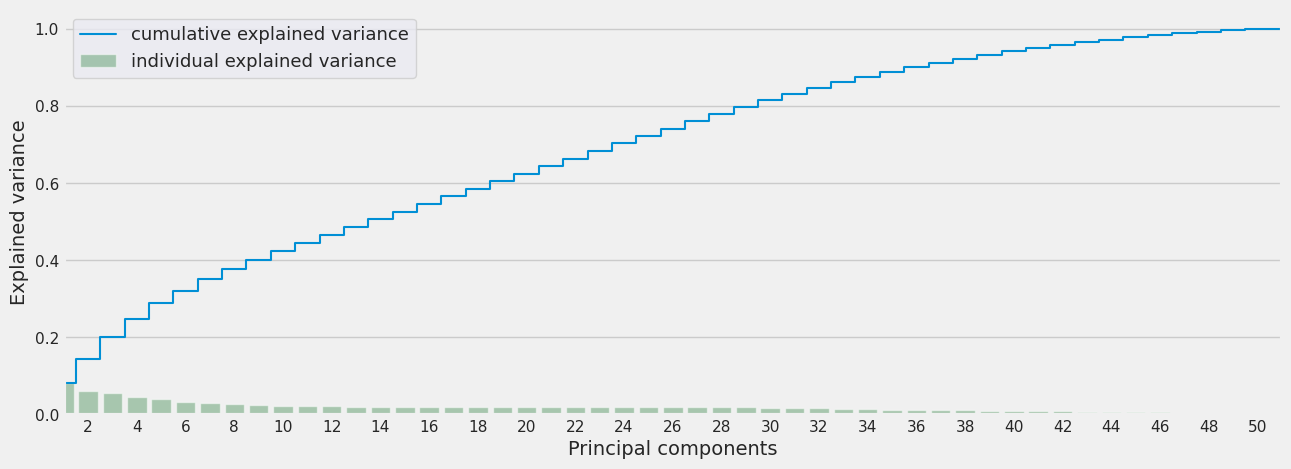

In [301]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(sa_comps.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(x=np.arange(1,sa_comps.shape[1]+1), y=pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 50)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13)

In [302]:
n_comps = 2
pca = PCA(n_components=n_comps)
# PCA transform and output to dataframe instead of array
sa_comps = pd.DataFrame(pca.fit_transform(rssa), columns=['PCA' + str(i+1) for i in range(n_comps)], index=rssa.index)
print(sa_comps.shape)

(9193, 2)


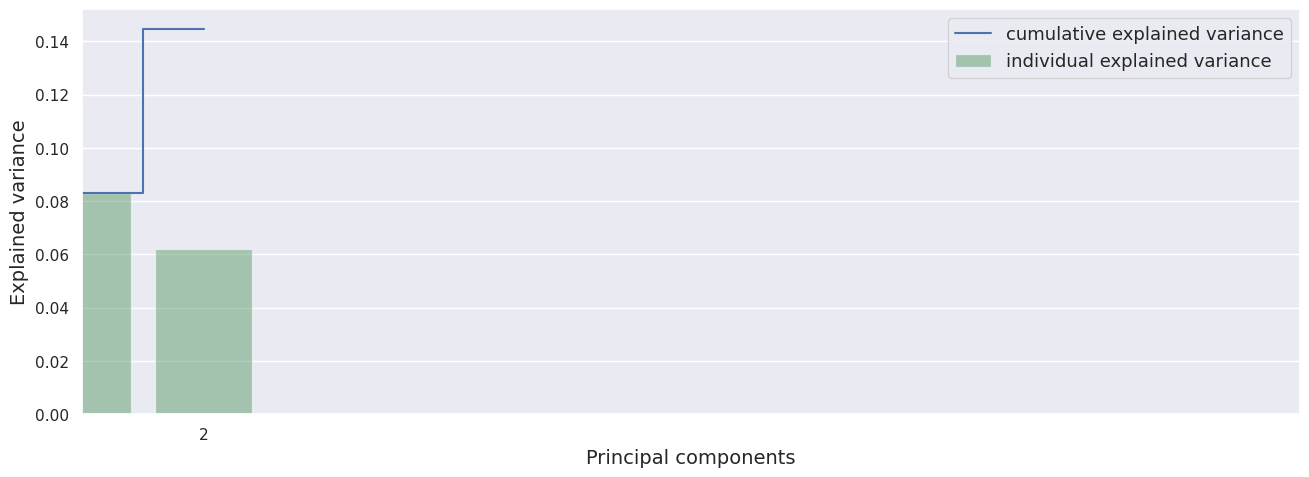

In [303]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(sa_comps.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(x=np.arange(1,sa_comps.shape[1]+1), y=pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13)

<Axes: ylabel='Frequency'>

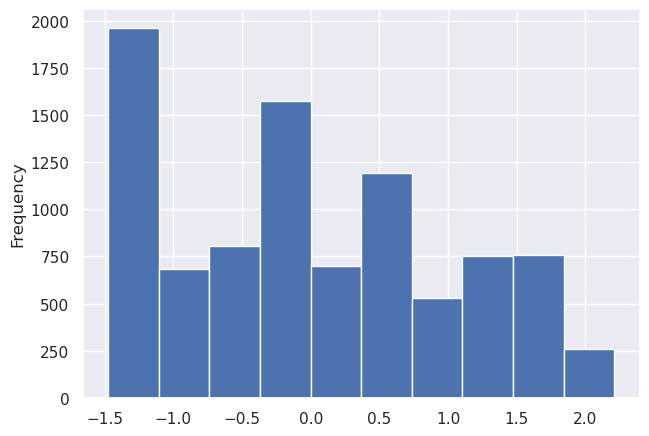

In [304]:
rs['ders_awareness_score_3_year'].plot.hist()

<Axes: ylabel='Frequency'>

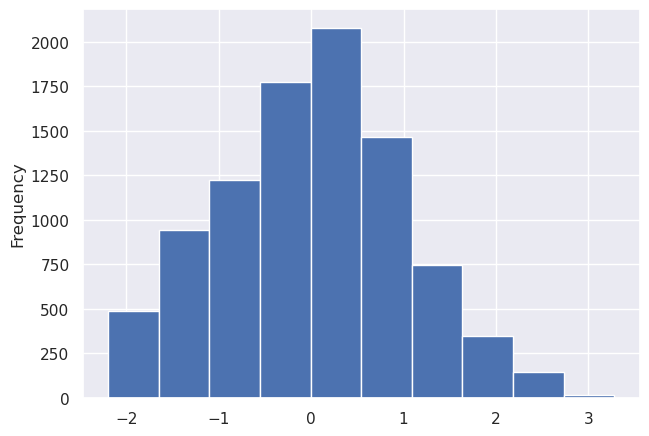

In [305]:
rs['ders_total_score_3_year'].plot.hist()

array([[<Axes: title={'center': 'rsfmri_var_cdk_insulalh'}>,
        <Axes: title={'center': 'rsfmri_var_cdk_insularh'}>,
        <Axes: title={'center': 'rsfmri_var_cdk_rlaclatelh'}>,
        <Axes: title={'center': 'rsfmri_var_cdk_rlaclaterh'}>],
       [<Axes: title={'center': 'rsfmri_var_cdk_entorhinallh'}>,
        <Axes: title={'center': 'rsfmri_var_cdk_entorhinalrh'}>,
        <Axes: title={'center': 'rsfmri_var_scs_amygdalalh'}>,
        <Axes: title={'center': 'rsfmri_var_scs_amygdalarh'}>]],
      dtype=object)

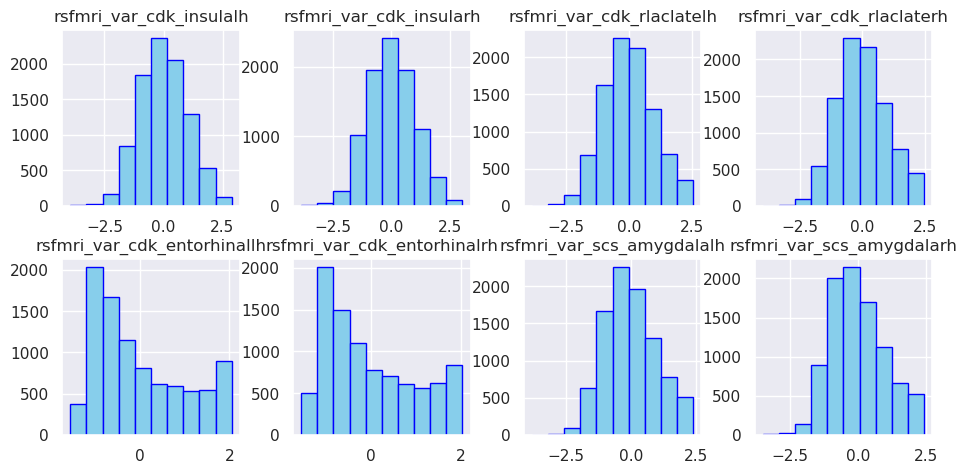

In [306]:
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
rs[rs.columns[:10].tolist()].hist(ax=ax, color='skyblue', edgecolor='blue')

In [307]:
rs.shape

(9222, 132)

### Correlation Matrix

In [214]:
len(dfm_sa)

18

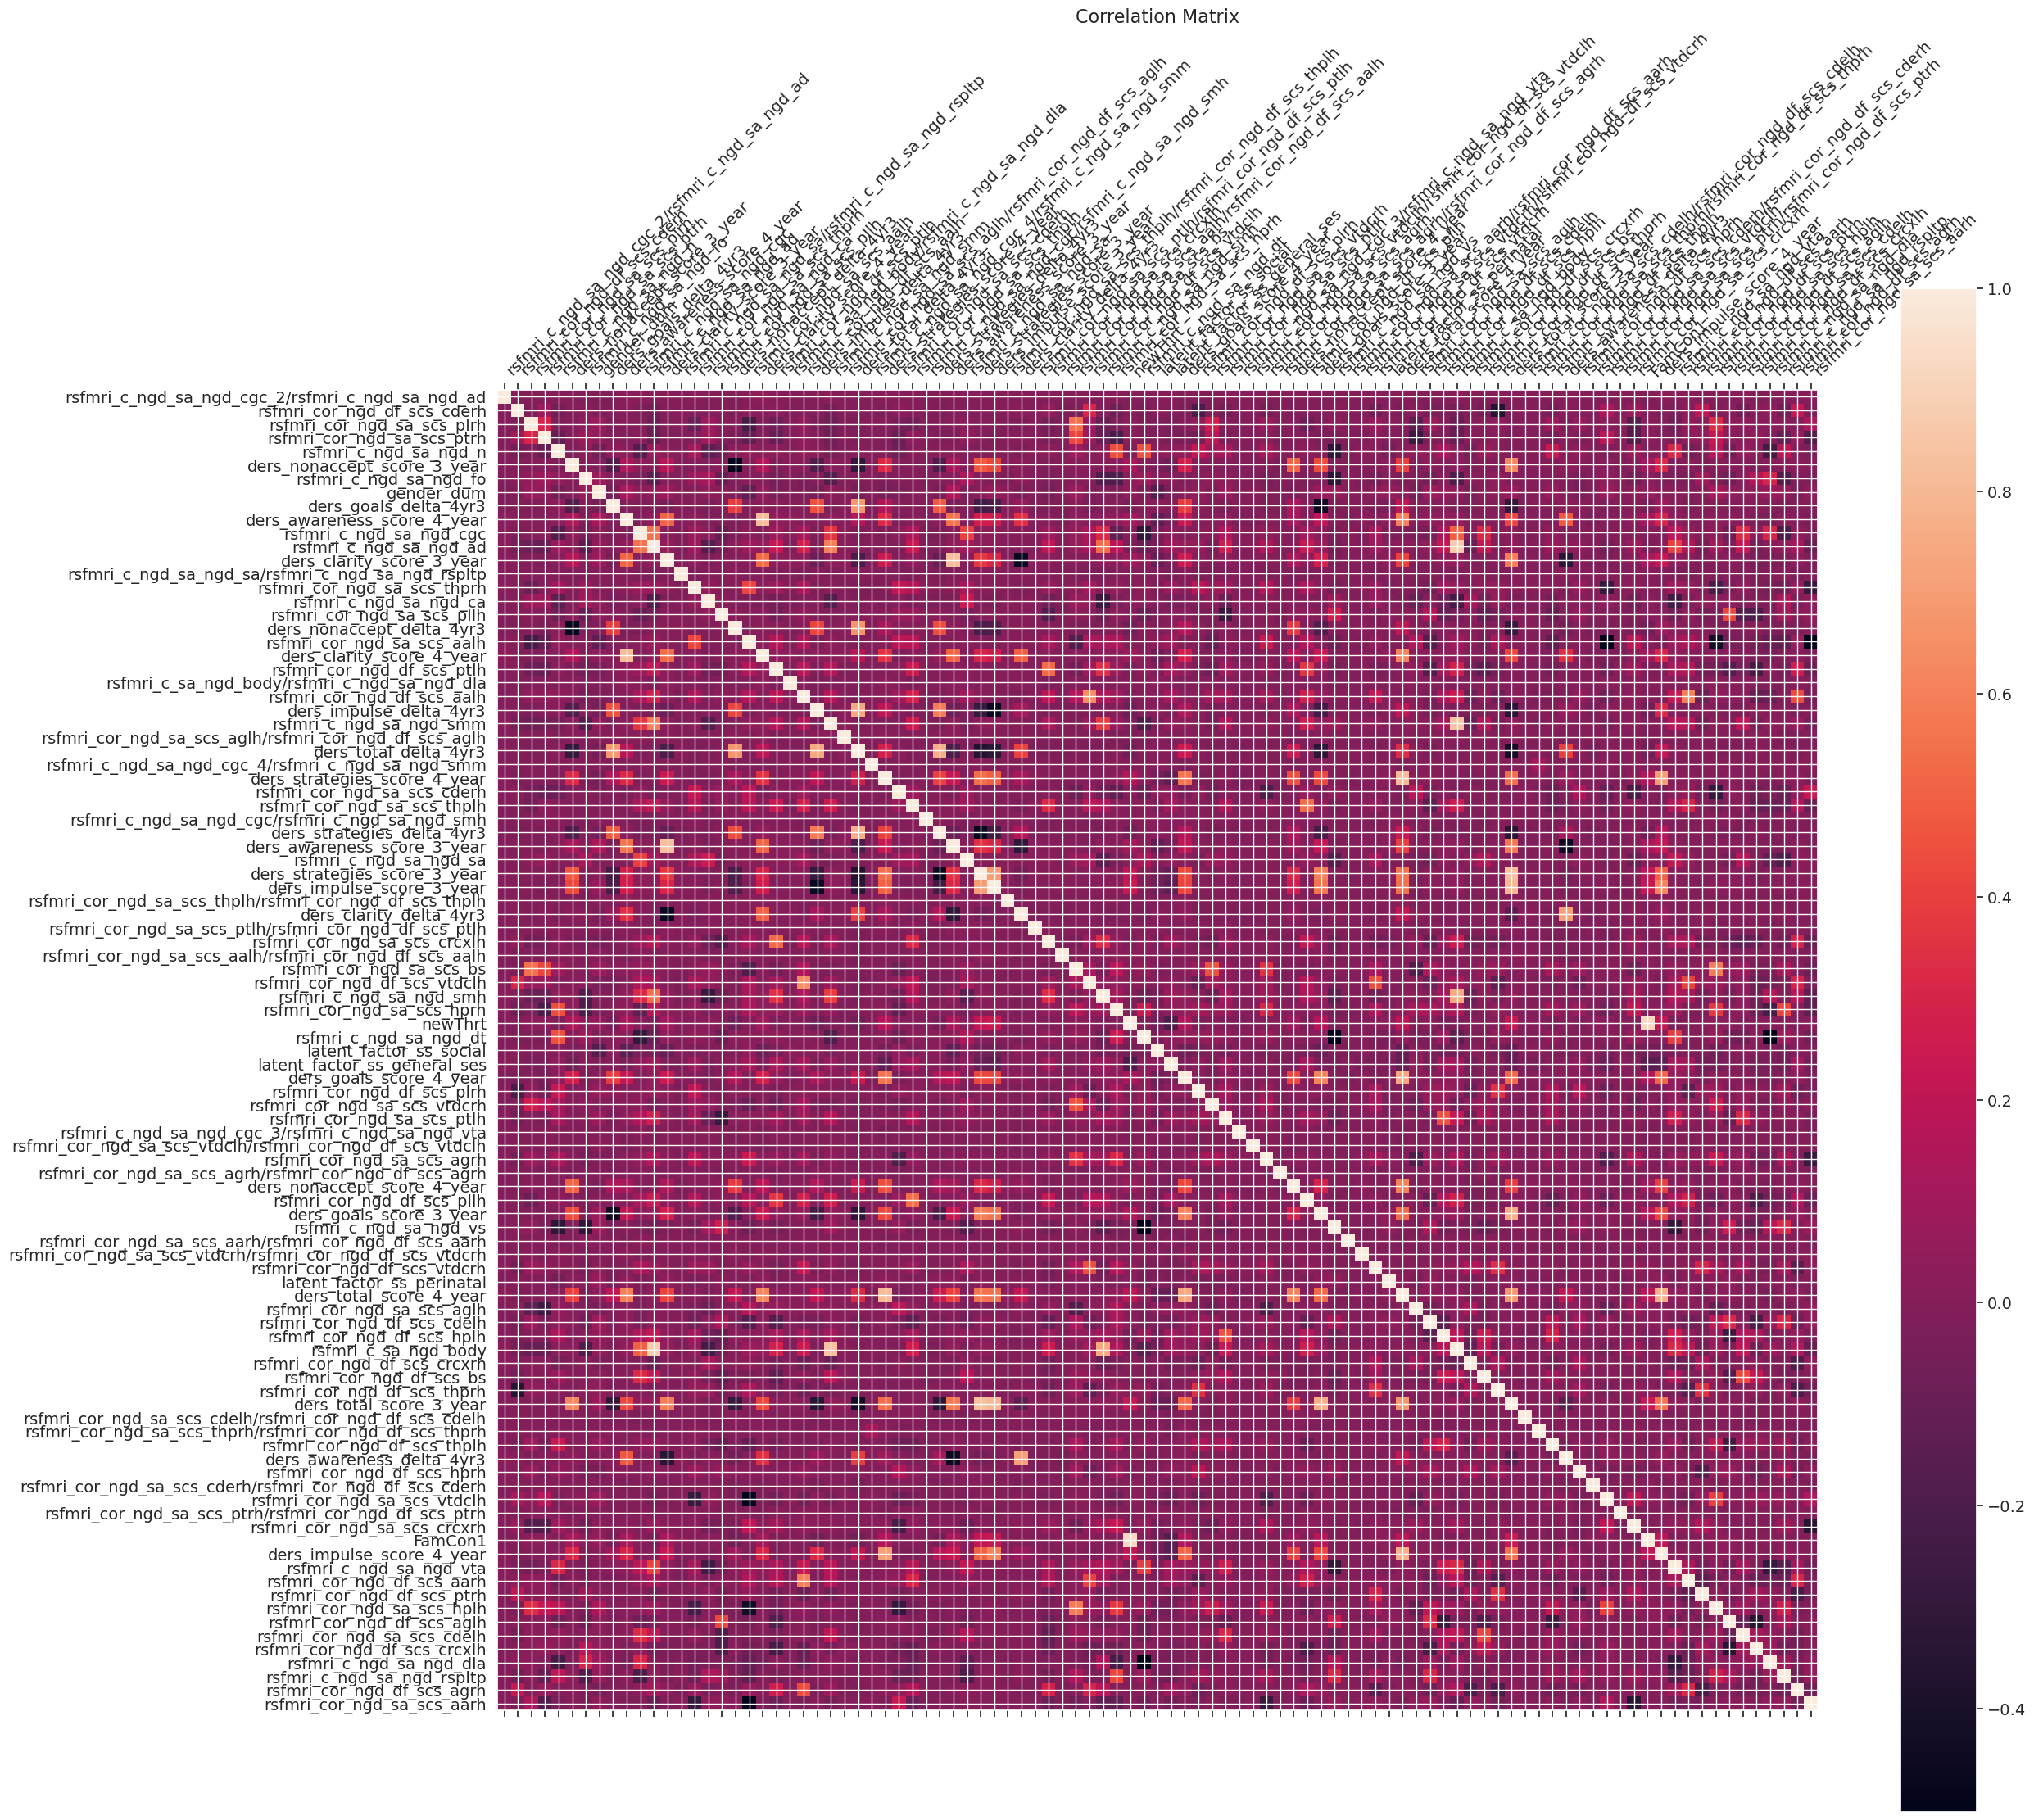

In [215]:
# tmp_ds = [c for c in dfm_sa if c not in tmp_c]
tmp_cols = rs_cor_nm
tmp_cols = list(set(tmp_cols).difference(['rsfmri_c_ngd_sa_ngd_cgc_2', 'rsfmri_c_ngd_sa_ngd_cgc_3', 'rsfmri_c_ngd_sa_ngd_cgc_4']))
corr_matrix = rs[tmp_cols].corr()#

f = plt.figure(figsize=(26, 24))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14, rotation=45, ha = 'left')
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
col_bar = plt.colorbar()
col_bar.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()
# print('\nCorrelation with T7 Awareness Subscale DERS:\n')
# corr_matrix.sort_values('ders_awareness_score_3_year', ascending=False)['ders_awareness_score_3_year']

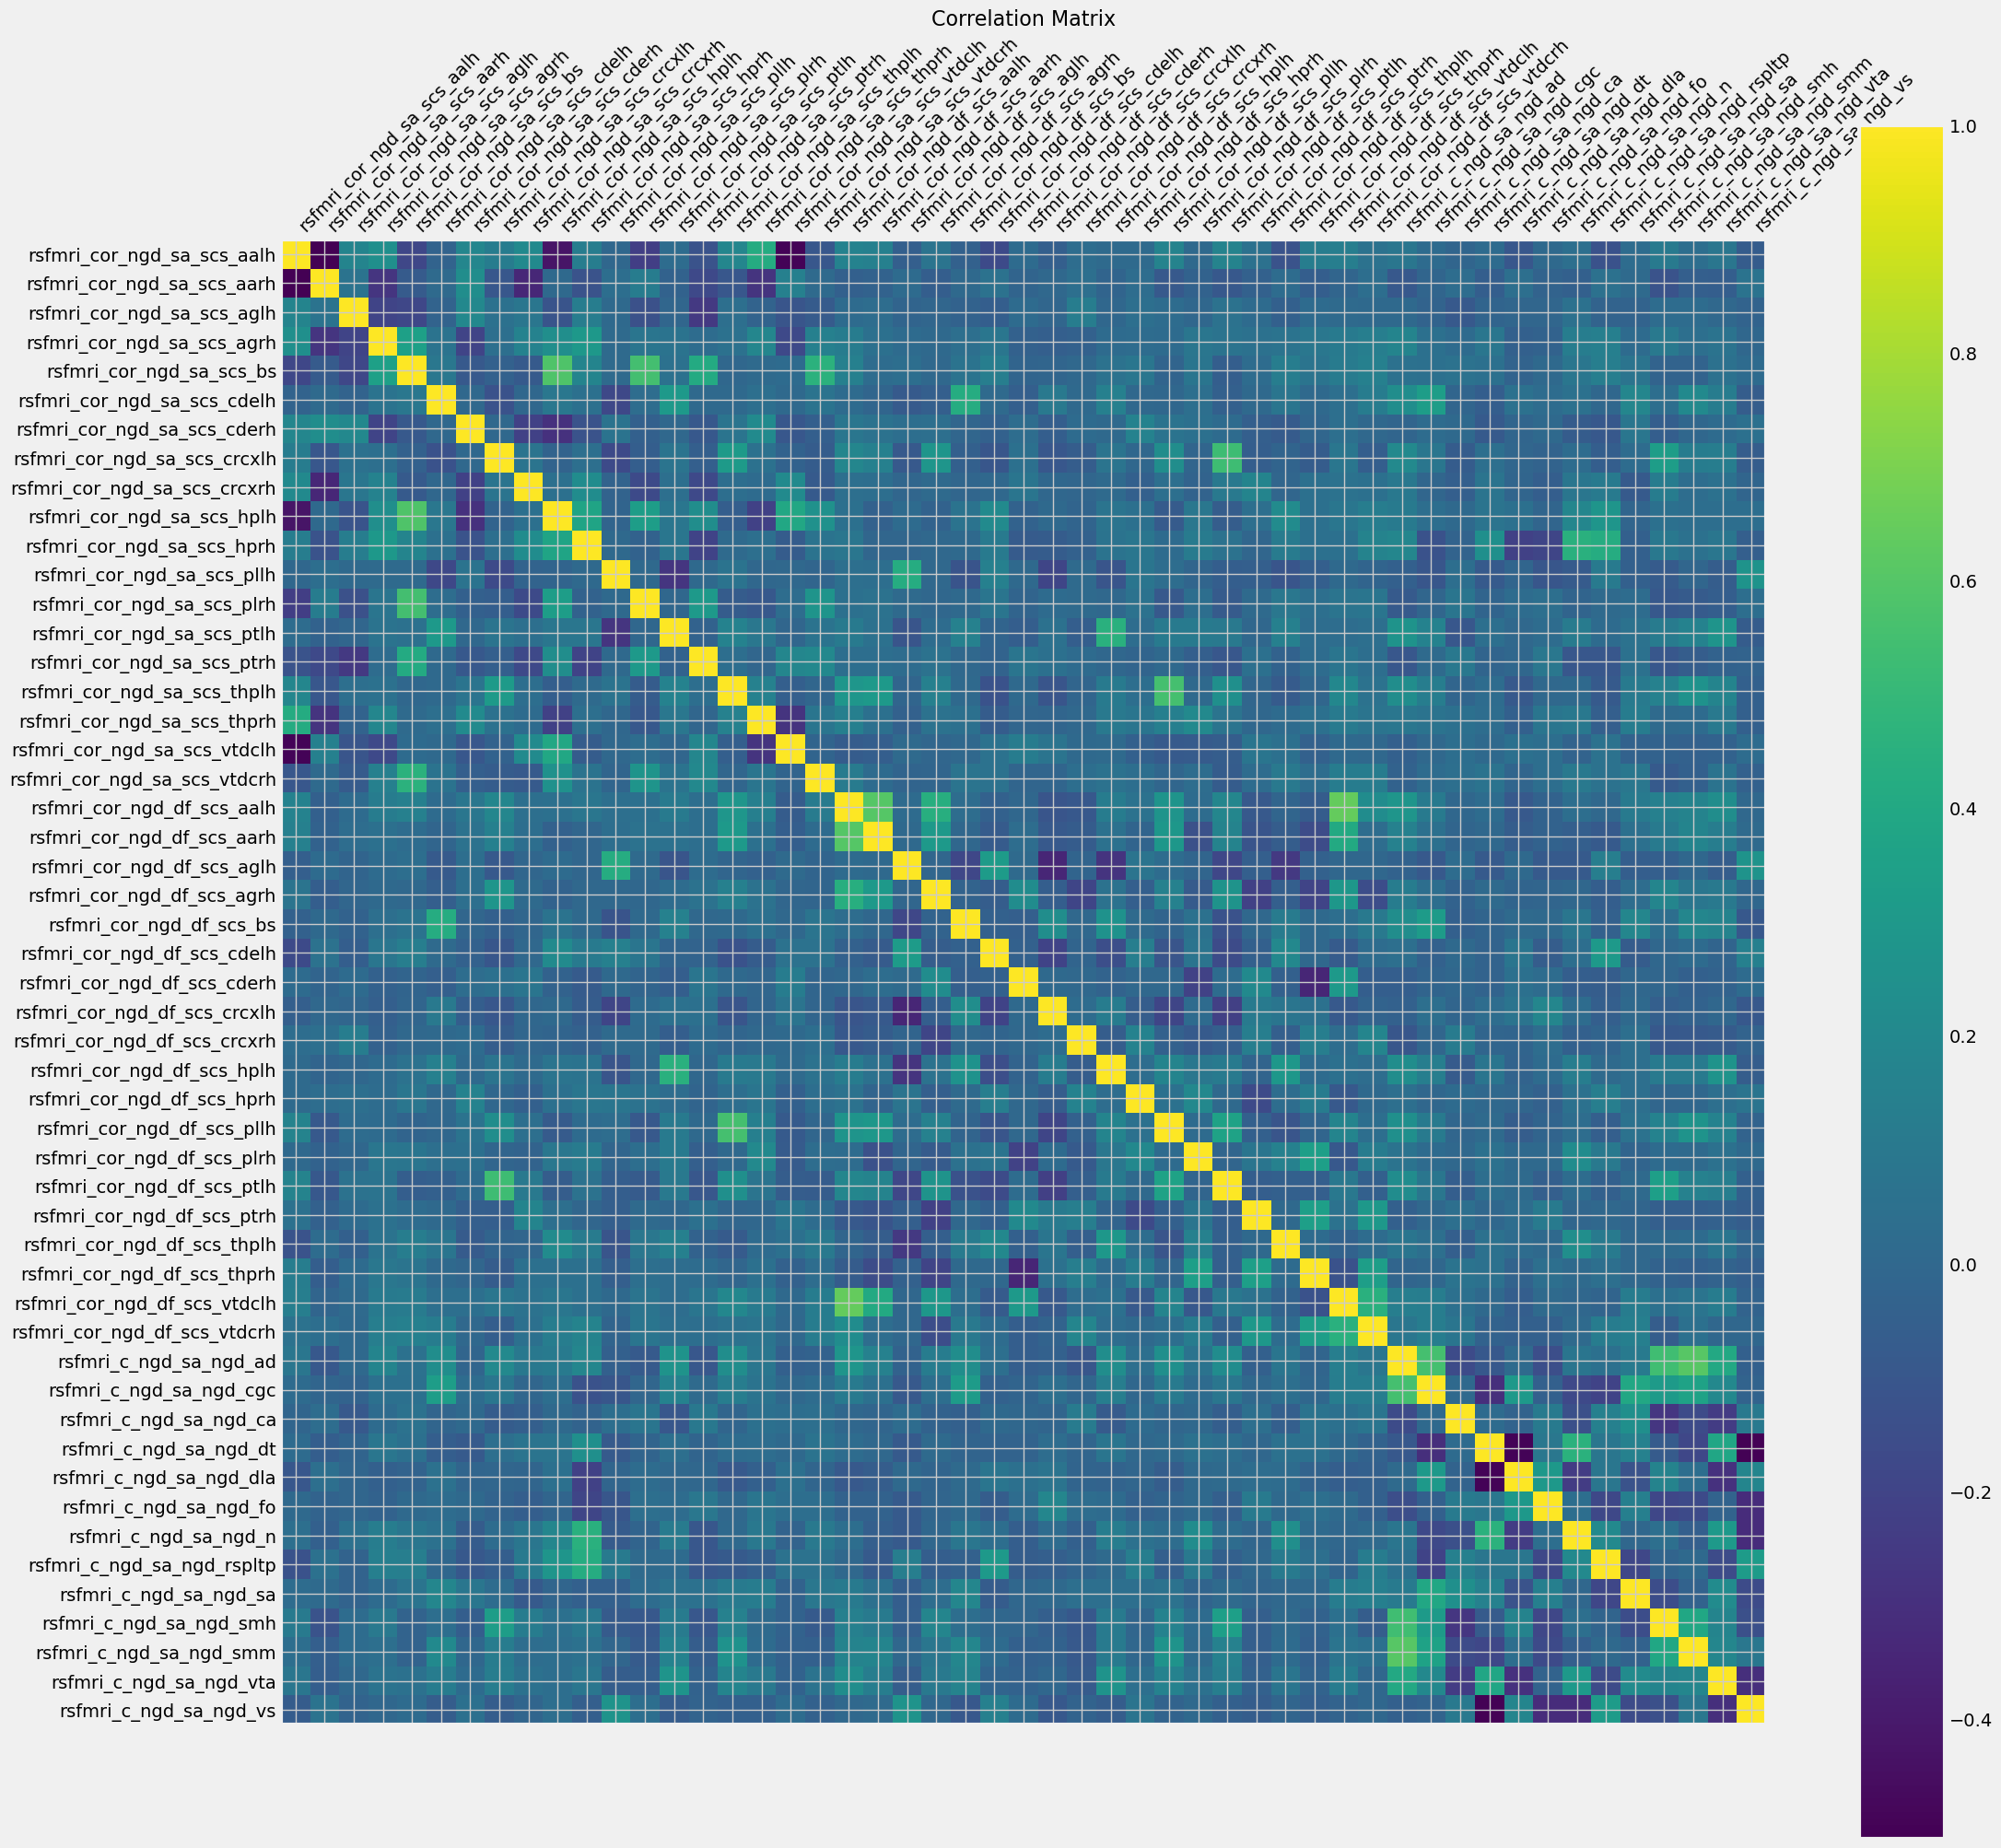

In [143]:
ccorr_matrix = rs[corr_cols].corr()#

f = plt.figure(figsize=(26, 24))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14, rotation=45, ha = 'left')
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
col_bar = plt.colorbar()
col_bar.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()
# print('\nCorrelation with T7 Awareness Subscale DERS:\n')
# corr_matrix.sort_values('ders_awareness_score_3_year', ascending=False)['ders_awareness_score_3_year']

In [97]:
len(tmp_cols)

97

In [216]:
colc = 'ders_awareness_score_3_year'
print('\nCorrelation with {}:\n'.format(colc))
corr_matrix.sort_values(colc, ascending=False)[colc]


Correlation with ders_awareness_score_3_year:



ders_awareness_score_3_year                                  1.000000
ders_clarity_score_3_year                                    0.829677
ders_total_score_3_year                                      0.581876
ders_awareness_score_4_year                                  0.564875
ders_clarity_score_4_year                                    0.509613
ders_total_score_4_year                                      0.403813
ders_strategies_score_3_year                                 0.348070
ders_impulse_score_3_year                                    0.307948
ders_impulse_score_4_year                                    0.230366
ders_strategies_score_4_year                                 0.229847
ders_goals_score_3_year                                      0.226466
ders_goals_score_4_year                                      0.201962
gender_dum                                                   0.140016
FamCon1                                                      0.129579
ders_nonaccept_score

In [217]:
sa_comps

array([[ 0.51908733,  2.64747285],
       [-0.893366  ,  4.13682941],
       [-0.42794782,  3.71854013],
       ...,
       [ 1.46788201,  0.29587785],
       [-3.49817303, -0.53108743],
       [ 0.38822447, -0.38563712]])

### Mediation Analysis

In [309]:
med_cols = ['src_subject_id', 'ders_awareness_score_3_year', 'interview_age', 'newThrt', 'rsfmri_c_ngd_sa_ngd_ad', 'rsfmri_cor_ngd_sa_scs_vtdclh', 'rsfmri_c_ngd_sa_ngd_ca', 'gender_cat', 'latent_factor_ss_general_ses']
# , 'rsfmri_c_ngd_sa_ngd_vta'
rsm_ = rs[med_cols].copy()
sa_comps.reset_index(inplace=True)
rsm = sa_comps.merge(rsm_, how='left', on='src_subject_id')
# drop nan in 'latent_factor_ss_general_ses'
rsm.dropna(subset=['latent_factor_ss_general_ses'], axis=0, inplace=True)

In [310]:
rsm.shape

(6671, 11)

In [311]:
rsm.shape

(6671, 11)

In [313]:
rsm.isnull().any()

src_subject_id                  False
PCA1                            False
PCA2                            False
ders_awareness_score_3_year     False
interview_age                   False
newThrt                         False
rsfmri_c_ngd_sa_ngd_ad          False
rsfmri_cor_ngd_sa_scs_vtdclh    False
rsfmri_c_ngd_sa_ngd_ca          False
gender_cat                      False
latent_factor_ss_general_ses    False
dtype: bool

In [107]:
rsm['rsfmri_cor_ngd_sa_scs_vtdclh'].isnull().sum()

1

In [314]:

probit = links.probit
outcome_model = sm.GLM.from_formula("ders_awareness_score_3_year ~ PCA2 + newThrt + gender_cat + latent_factor_ss_general_ses", rsm, family=sm.families.Binomial(link=probit()))
mediator_model = sm.OLS.from_formula("PCA2 ~ newThrt + gender_cat + latent_factor_ss_general_ses", rsm)
med = Mediation(outcome_model, mediator_model, "newThrt", "PCA2").fit()
med.summary()

Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)            0.000016       -0.000600        0.000750    0.800
ACME (treated)            0.000395       -0.010193        0.011393    0.920
ADE (control)             0.117438        0.108829        0.125618    0.000
ADE (treated)             0.117817        0.108380        0.127417    0.000
Total effect              0.117833        0.108230        0.127121    0.000
Prop. mediated (control)  0.000000       -0.005384        0.006395    0.800
Prop. mediated (treated)  0.004405       -0.092447        0.090915    0.920
ACME (average)            0.000205       -0.005097        0.005548    0.916
ADE (average)             0.117627        0.110551        0.125022    0.000
Prop. mediated (average)  0.001999       -0.046429        0.045403    0.916

In [315]:

probit = links.probit
outcome_model = sm.GLM.from_formula("ders_awareness_score_3_year ~ PCA2 + newThrt + gender_cat + latent_factor_ss_general_ses", rsm, family=sm.families.Binomial(link=probit()))
mediator_model = sm.OLS.from_formula("PCA2 ~ newThrt + gender_cat + latent_factor_ss_general_ses", rsm)
med = Mediation(outcome_model, mediator_model, "newThrt", "PCA2").fit()
med.summary()

Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)            0.000000        0.000000        0.000000    0.000
ACME (treated)           -0.000370       -0.005850        0.005546    0.848
ADE (control)             0.468217        0.463799        0.472643    0.000
ADE (treated)             0.467848        0.463345        0.472347    0.000
Total effect              0.467848        0.463345        0.472347    0.000
Prop. mediated (control)  0.000000        0.000000        0.000000    0.000
Prop. mediated (treated) -0.000963       -0.012607        0.011821    0.848
ACME (average)           -0.000185       -0.002925        0.002773    0.848
ADE (average)             0.468032        0.464546        0.471593    0.000
Prop. mediated (average) -0.000482       -0.006303        0.005911    0.848

In [102]:
probit = links.probit
outcome_model = sm.GLM.from_formula("ders_awareness_score_3_year ~ rsfmri_c_ngd_sa_ngd_ca + newThrt + gender_cat + latent_factor_ss_general_ses", rsm, family=sm.families.Binomial(link=probit()))
mediator_model = sm.OLS.from_formula("rsfmri_c_ngd_sa_ngd_ca ~ newThrt + gender_cat + latent_factor_ss_general_ses", rsm)
med = Mediation(outcome_model, mediator_model, "newThrt", "rsfmri_c_ngd_sa_ngd_ca").fit()
med.summary()

Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)           -0.000034       -0.000747        0.000598    0.784
ACME (treated)           -0.006149       -0.018842        0.007347    0.374
ADE (control)             0.265438        0.254559        0.276981    0.000
ADE (treated)             0.259323        0.247534        0.271898    0.000
Total effect              0.259289        0.247676        0.271902    0.000
Prop. mediated (control)  0.000000       -0.002934        0.002330    0.784
Prop. mediated (treated) -0.024240       -0.075344        0.027961    0.374
ACME (average)           -0.003091       -0.009568        0.003666    0.372
ADE (average)             0.262380        0.253662        0.272126    0.000
Prop. mediated (average) -0.012355       -0.038578        0.013563    0.372

In [103]:
probit = links.probit
outcome_model = sm.GLM.from_formula("ders_total_score_3_year ~ rsfmri_c_ngd_sa_ngd_ca + newThrt + gender_cat + latent_factor_ss_general_ses", rsm, family=sm.families.Binomial(link=probit()))
mediator_model = sm.OLS.from_formula("rsfmri_c_ngd_sa_ngd_ca ~ newThrt + gender_cat + latent_factor_ss_general_ses", rsm)
med = Mediation(outcome_model, mediator_model, "newThrt", "rsfmri_c_ngd_sa_ngd_ca").fit()
med.summary()

Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)            0.000000        0.000000        0.000000    0.000
ACME (treated)           -0.002570       -0.010314        0.005680    0.504
ADE (control)             0.113801        0.108072        0.120329    0.000
ADE (treated)             0.111230        0.104780        0.117788    0.000
Total effect              0.111230        0.104780        0.117788    0.000
Prop. mediated (control)  0.000000        0.000000        0.000000    0.000
Prop. mediated (treated) -0.023319       -0.095714        0.047740    0.504
ACME (average)           -0.001285       -0.005157        0.002840    0.504
ADE (average)             0.112516        0.107846        0.117790    0.000
Prop. mediated (average) -0.011659       -0.047857        0.023870    0.504

In [95]:
probit = links.probit
outcome_model = sm.GLM.from_formula("ders_awareness_score_3_year ~ rsfmri_c_ngd_sa_ngd_vta + newThrt + demo_gender_id_v2 + latent_factor_ss_general_ses", rs, family=sm.families.Binomial(link=probit()))
mediator_model = sm.OLS.from_formula("rsfmri_c_ngd_sa_ngd_vta ~ newThrt + demo_gender_id_v2 + latent_factor_ss_general_ses", rs)
med = Mediation(outcome_model, mediator_model, "newThrt", "rsfmri_c_ngd_sa_ngd_vta").fit()
med.summary()

Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)            0.000004       -0.000664        0.000664    0.476
ACME (treated)            0.002224       -0.012944        0.017590    0.796
ADE (control)             0.103949        0.091935        0.115508    0.000
ADE (treated)             0.106169        0.093263        0.119150    0.000
Total effect              0.106174        0.093263        0.119159    0.000
Prop. mediated (control)  0.000000       -0.006369        0.006310    0.476
Prop. mediated (treated)  0.018267       -0.129500        0.154082    0.796
ACME (average)            0.001114       -0.006472        0.008795    0.808
ADE (average)             0.105059        0.095577        0.114674    0.000
Prop. mediated (average)  0.009347       -0.065451        0.077292    0.808

In [97]:
probit = links.probit
outcome_model = sm.GLM.from_formula("ders_awareness_score_3_year ~ rsfmri_cor_ngd_sa_scs_vtdclh + newThrt + demo_gender_id_v2 + latent_factor_ss_general_ses", rs, family=sm.families.Binomial(link=probit()))
mediator_model = sm.OLS.from_formula("rsfmri_cor_ngd_sa_scs_vtdclh ~ newThrt + demo_gender_id_v2 + latent_factor_ss_general_ses", rs)
med = Mediation(outcome_model, mediator_model, "newThrt", "rsfmri_cor_ngd_sa_scs_vtdclh").fit()
med.summary()

Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)           -0.000065       -0.002655        0.002655    0.898
ACME (treated)           -0.000546       -0.018254        0.015599    0.944
ADE (control)             0.131584        0.118155        0.144706    0.000
ADE (treated)             0.131104        0.116827        0.145046    0.000
Total effect              0.131038        0.117151        0.145038    0.000
Prop. mediated (control)  0.000000       -0.021742        0.019515    0.898
Prop. mediated (treated) -0.002491       -0.153021        0.109080    0.944
ACME (average)           -0.000306       -0.009459        0.007634    0.962
ADE (average)             0.131344        0.120806        0.142383    0.000
Prop. mediated (average) -0.001226       -0.076832        0.054350    0.962

In [152]:
rsm.drop(columns='gender_cat').corr()

ders_awareness_score_3_year  interview_age   newThrt  rsfmri_c_ngd_sa_ngd_ca  latent_factor_ss_general_ses
ders_awareness_score_3_year                      1.000000       0.000319  0.103937               -0.025841                     -0.035841
interview_age                                    0.000319       1.000000 -0.017838                0.026508                      0.012648
newThrt                                          0.103937      -0.017838  1.000000                0.036894                     -0.196238
rsfmri_c_ngd_sa_ngd_ca                          -0.025841       0.026508  0.036894                1.000000                     -0.029046
latent_factor_ss_general_ses                    -0.035841       0.012648 -0.196238               -0.029046                      1.000000

In [41]:
rsm.corr()

ders_awareness_score_3_year   newThrt  rsfmri_c_ngd_sa_ngd_vta
ders_awareness_score_3_year                     1.000000  0.115076                 0.036720
newThrt                                         0.115076  1.000000                -0.002381
rsfmri_c_ngd_sa_ngd_vta                         0.036720 -0.002381                 1.000000

In [32]:
colc = 'ders_total_score_3_year'
print('\nCorrelation with {}:\n'.format(colc))
corr_matrix.sort_values(colc, ascending=False)[colc]


Correlation with ders_total_score_3_year:



ders_total_score_3_year                                      1.000000
ders_strategies_score_3_year                                 0.826722
ders_impulse_score_3_year                                    0.799160
ders_goals_score_3_year                                      0.763938
ders_total_score_4_year                                      0.677438
ders_nonaccept_score_3_year                                  0.624215
ders_clarity_score_3_year                                    0.576607
ders_awareness_score_3_year                                  0.573845
ders_impulse_score_4_year                                    0.556277
ders_strategies_score_4_year                                 0.542092
ders_goals_score_4_year                                      0.519919
ders_clarity_score_4_year                                    0.425925
ders_awareness_score_4_year                                  0.419522
ders_nonaccept_score_4_year                                  0.393018
newThrt             

In [233]:
colc = 'ders_impulse_score_3_year'
print('\nCorrelation with {}:\n'.format(colc))
corr_matrix.sort_values(colc, ascending=False)[colc]


Correlation with ders_impulse_score_3_year:



ders_impulse_score_3_year                                    1.000000
ders_total_score_3_year                                      0.799160
ders_strategies_score_3_year                                 0.705003
ders_impulse_score_4_year                                    0.616161
ders_goals_score_3_year                                      0.569280
ders_total_score_4_year                                      0.558392
ders_strategies_score_4_year                                 0.494445
ders_nonaccept_score_3_year                                  0.421469
ders_goals_score_4_year                                      0.413832
ders_awareness_score_3_year                                  0.297307
ders_clarity_score_3_year                                    0.292565
ders_nonaccept_score_4_year                                  0.277371
ders_awareness_score_4_year                                  0.265400
ders_clarity_score_4_year                                    0.262074
newThrt             

In [234]:
# rsfmri_c_ngd_sa_ngd_rspitp
# rsfmri_c_ngd_rspltp_ngd_sa
colc = 'ders_awareness_delta_4yr3'
print('\nCorrelation with {}:\n'.format(colc))
corr_matrix.sort_values(colc, ascending=False)[colc]


Correlation with ders_awareness_delta_4yr3:



ders_awareness_delta_4yr3                                    1.000000
ders_clarity_delta_4yr3                                      0.714999
ders_awareness_score_4_year                                  0.475511
ders_total_delta_4yr3                                        0.396004
ders_clarity_score_4_year                                    0.346396
ders_total_score_4_year                                      0.213608
ders_strategies_delta_4yr3                                   0.115974
ders_strategies_score_4_year                                 0.089748
ders_impulse_delta_4yr3                                      0.080466
ders_impulse_score_4_year                                    0.071217
ders_nonaccept_score_3_year                                  0.035204
rsfmri_cor_ngd_sa_scs_vtdclh                                 0.032824
rsfmri_c_ngd_sa_ngd_rspltp                                   0.030745
rsfmri_c_ngd_sa_ngd_vs                                       0.027202
rsfmri_cor_ngd_sa_sc

### Split data for Training/Validation and Test
* rs_train_val will be split further during 5fold cross validation 

In [153]:
# copy df then change NaN to 9999
rsrf = rs.copy()
rsrf[rsrf.isnull()] = 9999
print(rsrf.shape)

(9222, 133)


In [154]:
# split off 20% of data, that the model is **not** trained or validated on, for the final test
rs_train_val, rs_test = train_test_split(rsrf, train_size = 0.8, random_state=9977)
print('Set Sizes:\n  Training & Validation: {0}\n  Testing: {1}'.format(rs_train_val.shape[0], rs_test.shape[0]))

Set Sizes:
  Training & Validation: 7377
  Testing: 1845


## Machine Learning
* to predict DERS Emotional regulation, operationalized as DERs Awareness subscale score, using resting state fMRI activity

In [ ]:
############
## Create Model Processing Pipeline
###### Standardize feature and target variables to have a mean of 0 and std of 1
###### Random Forest Regressor
############
pipe = Pipeline(steps=
    [
        ('scaler', StandardScaler()),
        ('RF', RandomForestRegressor(random_state=979, n_jobs=-1)),
    ]
)

#############
## Dictionary for range of hyperparameters to be grid searched and tuned below
#############
depth_steps = np.arange(14)[1:]
param_grid = {
    'RF__n_estimators': [500, 1000, 1500, 2000, 3000, 4000], 
    'RF__max_depth': depth_steps, 
    'RF__criterion': ['squared_error', 'friedman_mse'],
    'RF__min_samples_split': [2, 5, 20, 40, 80],
    'RF__max_features': [0.5, 0.75, 1],
    'RF__max_samples': [0.5, 0.75, 1],
}

# param_grid = {
#     'RF__n_estimators': [100],
#     'RF__criterion': ['squared_error'],
# }

#############
## Grid Search Cross Validation (5-fold)
#############
cv_folds = 5
grid = GridSearchCV(pipe, param_grid, cv=cv_folds, refit='neg_root_mean_squared_error', scoring=['neg_root_mean_squared_error', 'r2', 'neg_mean_squared_error'], return_train_score=True, n_jobs=-1, verbose=4)

# preditor features to use setup
cols_num = list(set(rs.columns).difference(cols_stry))
cols_num += dfm_sa
er_nms = [c for c in rs.columns if '_year' in c or '4yr3' in c]
cols_stry = ['src_subject_id', 'eventname'] + er_nms

X_train_val = rs_train_val.drop(cols_stry, axis=1)
Y_train_val = rs_train_val['ders_awareness_score_3_year']
grid.fit(X_train_val, Y_train_val)
# show optimal hyperparameters
print(grid.best_params_)

In [ ]:
grid.best_score_

In [ ]:

plt.figure(figsize=(4, 24))
features = X_train_val.columns
importances = grid.best_estimator_.named_steps["RF"].feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Plot Gridsearch results

In [ ]:
results = grid.cv_results_
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)

for scorer, color in zip(sorted(scoring), ["g", "k"]):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=color,
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [198]:

class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))


In [199]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Random Forest

### Specifiy predictor and target variables

In [155]:
er_nms = [c for c in rs.columns if '_year' in c or '4yr3' in c]
# Not excluded currently: 'interview_age'
cols_stry = ['src_subject_id', 'eventname', 'gender_cat', 'site_id_l', 'rel_family_id', 'rel_birth_id', 'school_id', 'district_id', 'interview_date', 'visit_type'] + er_nms
rs_train, rs_val = train_test_split(rs_train_val, train_size = 0.8, random_state=9977)
X_train = rs_train.drop(cols_stry, axis=1)
# Y_train = rs_train['ders_awareness_score_3_year']
Y_train = rs_train['ders_awareness_score_3_year']
print(X_train.shape)
print(Y_train.shape)

(5901, 102)
(5901,)


In [55]:
sorted(X_train.columns.tolist())

['FamCon1',
 'gender_dum',
 'interview_age',
 'latent_factor_ss_general_ses',
 'latent_factor_ss_perinatal',
 'latent_factor_ss_social',
 'mrirsfd121',
 'mrirsfd122',
 'mrirsfd123',
 'mrirsfd47',
 'mrirsfd48',
 'mrirsfd49',
 'newThrt',
 'rsfmri_c_ngd_sa_ngd_ad',
 'rsfmri_c_ngd_sa_ngd_ca',
 'rsfmri_c_ngd_sa_ngd_cgc',
 'rsfmri_c_ngd_sa_ngd_cgc/rsfmri_c_ngd_sa_ngd_smh',
 'rsfmri_c_ngd_sa_ngd_cgc_2',
 'rsfmri_c_ngd_sa_ngd_cgc_2/rsfmri_c_ngd_sa_ngd_ad',
 'rsfmri_c_ngd_sa_ngd_cgc_3',
 'rsfmri_c_ngd_sa_ngd_cgc_3/rsfmri_c_ngd_sa_ngd_vta',
 'rsfmri_c_ngd_sa_ngd_cgc_4',
 'rsfmri_c_ngd_sa_ngd_cgc_4/rsfmri_c_ngd_sa_ngd_smm',
 'rsfmri_c_ngd_sa_ngd_dla',
 'rsfmri_c_ngd_sa_ngd_dt',
 'rsfmri_c_ngd_sa_ngd_fo',
 'rsfmri_c_ngd_sa_ngd_n',
 'rsfmri_c_ngd_sa_ngd_rspltp',
 'rsfmri_c_ngd_sa_ngd_sa',
 'rsfmri_c_ngd_sa_ngd_sa/rsfmri_c_ngd_sa_ngd_rspltp',
 'rsfmri_c_ngd_sa_ngd_smh',
 'rsfmri_c_ngd_sa_ngd_smm',
 'rsfmri_c_ngd_sa_ngd_vs',
 'rsfmri_c_ngd_sa_ngd_vta',
 'rsfmri_cor_ngd_df_scs_aalh',
 'rsfmri_cor_ngd_

In [156]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [157]:
X_val = rs_val.drop(cols_stry, axis=1)
Y_val = rs_val['ders_awareness_score_3_year']
y_pred = rf.predict(X_val)

In [158]:

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_val, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_val, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(Y_val, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(Y_val, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(Y_val, y_pred))
print('Max Error:', metrics.max_error(Y_val, y_pred))
# print('Mean Squared Log Error:', metrics.mean_squared_log_error(Y_val, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(Y_val, y_pred))
print('R^2:', metrics.r2_score(Y_val, y_pred))
# print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(Y_val, y_pred))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(Y_val, y_pred))

Mean Absolute Error (MAE): 0.8270513915938373
Mean Squared Error (MSE): 0.9965300386522313
Root Mean Squared Error (RMSE): 0.9982635116301865
Mean Absolute Percentage Error (MAPE): 1.0769240609981168
Explained Variance Score: 0.03290502528065142
Max Error: 2.6022892132893203
Median Absolute Error: 0.7618194683445138
R^2: 0.02981413763734375


In [52]:

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_val, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_val, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(Y_val, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(Y_val, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(Y_val, y_pred))
print('Max Error:', metrics.max_error(Y_val, y_pred))
# print('Mean Squared Log Error:', metrics.mean_squared_log_error(Y_val, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(Y_val, y_pred))
print('R^2:', metrics.r2_score(Y_val, y_pred))
# print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(Y_val, y_pred))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(Y_val, y_pred))

Mean Absolute Error (MAE): 0.8283761988664559
Mean Squared Error (MSE): 0.9961735631099881
Root Mean Squared Error (RMSE): 0.9980849478426113
Mean Absolute Percentage Error (MAPE): 1.0899356252523031
Explained Variance Score: 0.03354350410476736
Max Error: 2.641001467347316
Median Absolute Error: 0.762986285657123
R^2: 0.030161189424995016


In [156]:

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_val, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_val, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(Y_val, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(Y_val, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(Y_val, y_pred))
print('Max Error:', metrics.max_error(Y_val, y_pred))
# print('Mean Squared Log Error:', metrics.mean_squared_log_error(Y_val, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(Y_val, y_pred))
print('R^2:', metrics.r2_score(Y_val, y_pred))
# print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(Y_val, y_pred))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(Y_val, y_pred))

Mean Absolute Error (MAE): 0.8435290397807856
Mean Squared Error (MSE): 1.0455955599601998
Root Mean Squared Error (RMSE): 1.0225436714195633
Mean Absolute Percentage Error (MAPE): 1.1232063272859163
Explained Variance Score: -0.018651952676312478
Max Error: 2.457854742552333
Median Absolute Error: 0.7562355511877081
R^2: -0.01865711656324276


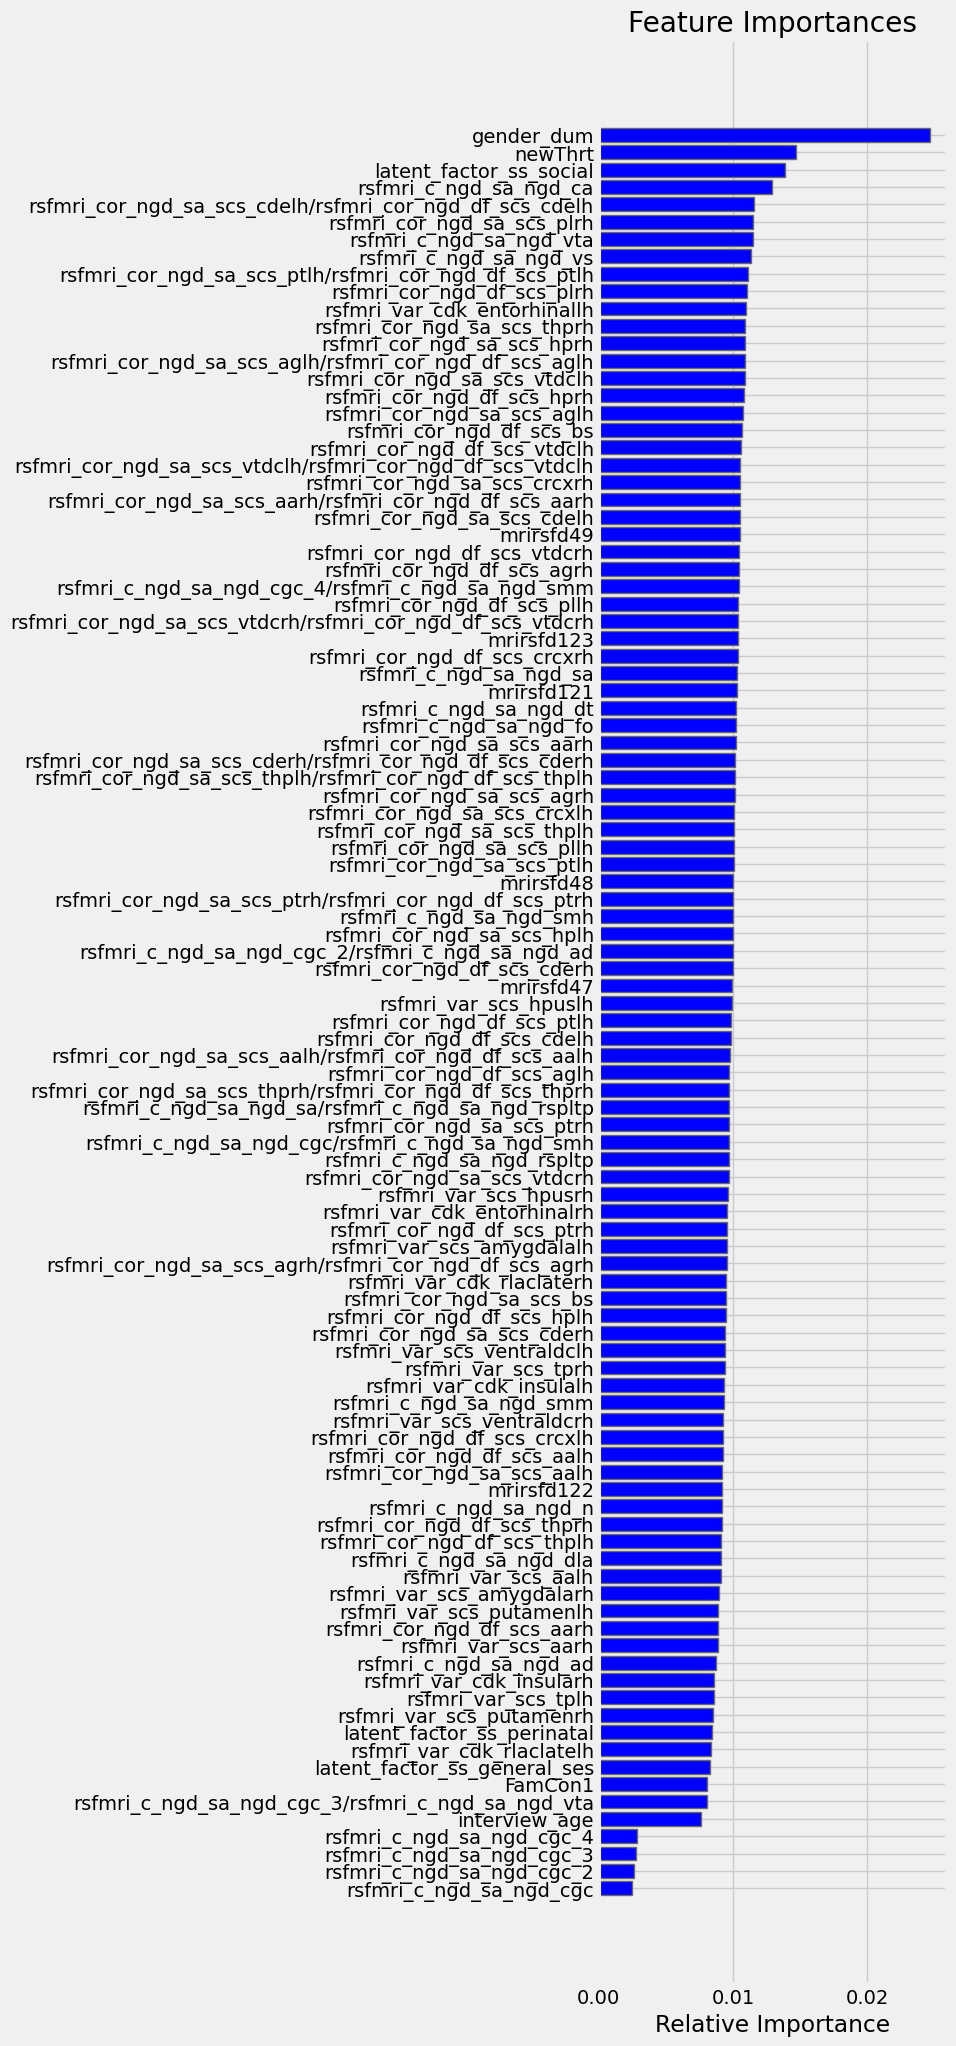

In [53]:
plt.figure(figsize=(4, 24))
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

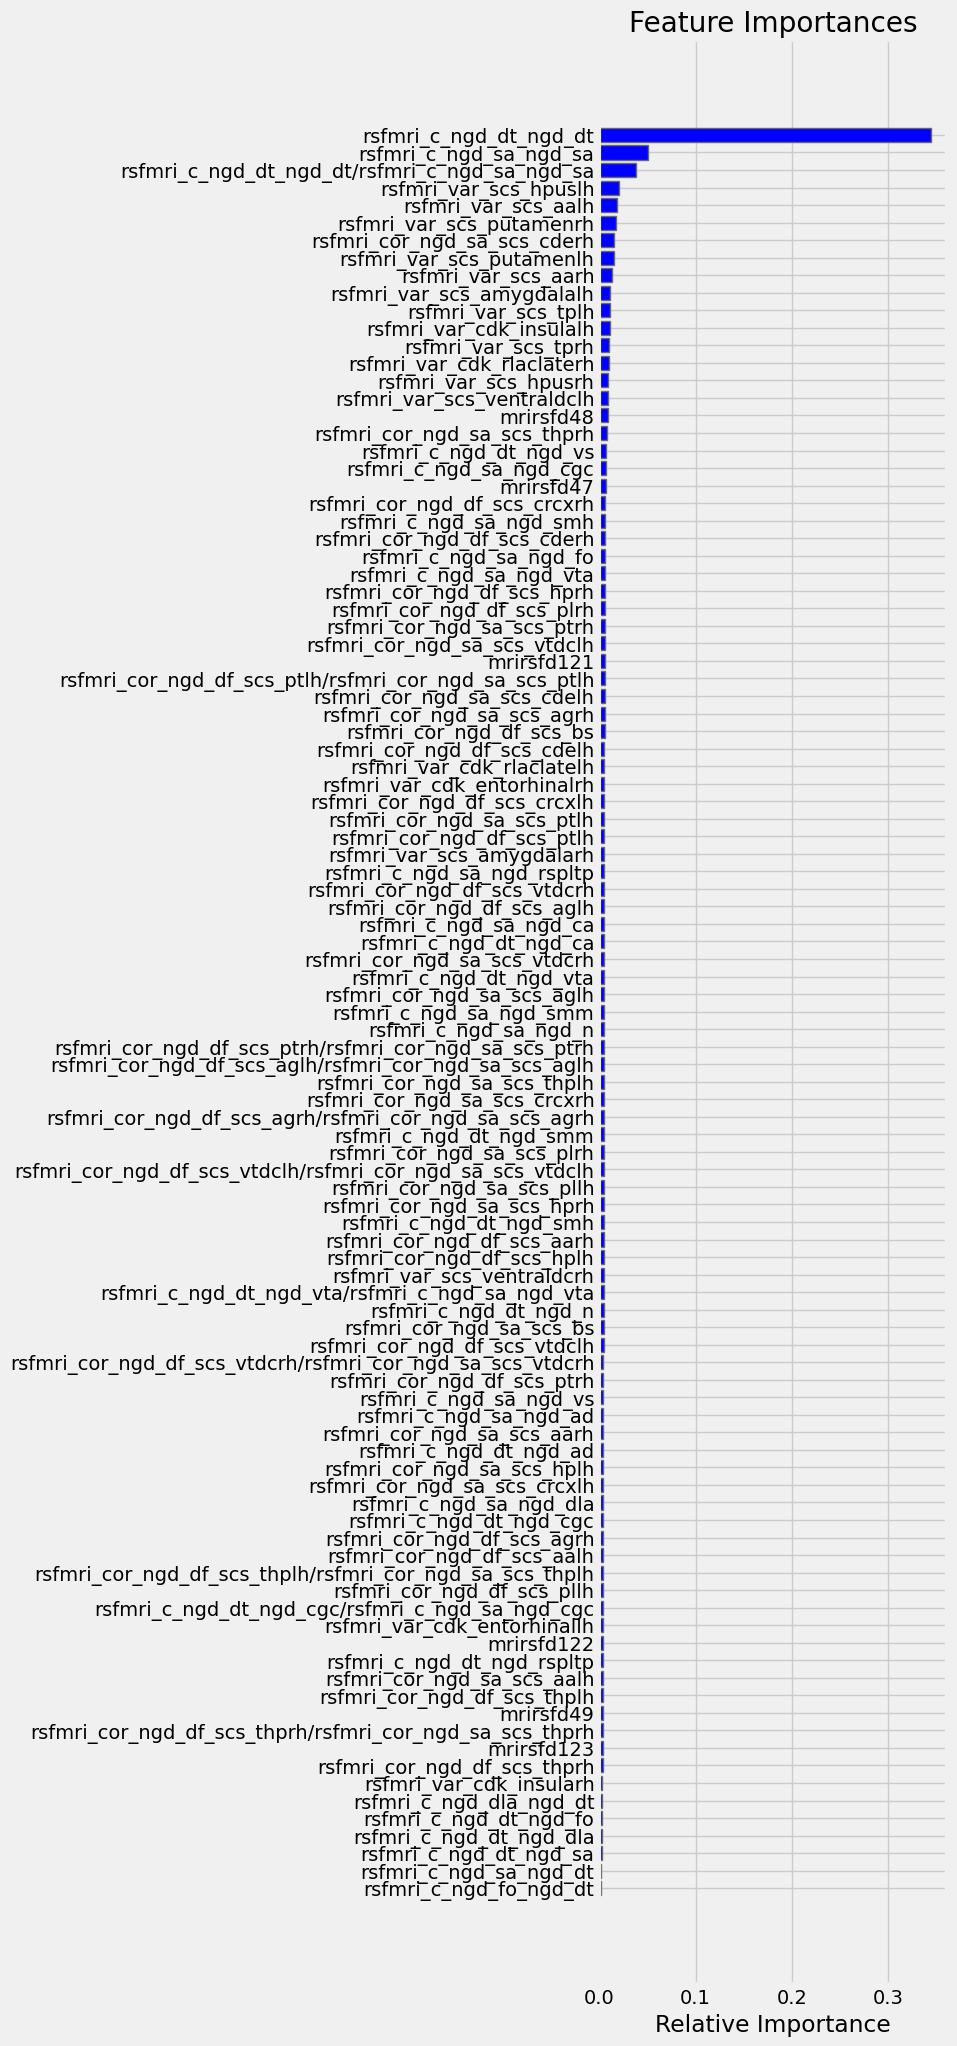

In [146]:
plt.figure(figsize=(4, 24))
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<Axes: xlabel='rsfmri_c_ngd_sa_ngd_sa', ylabel='ders_awareness_score_3_year'>

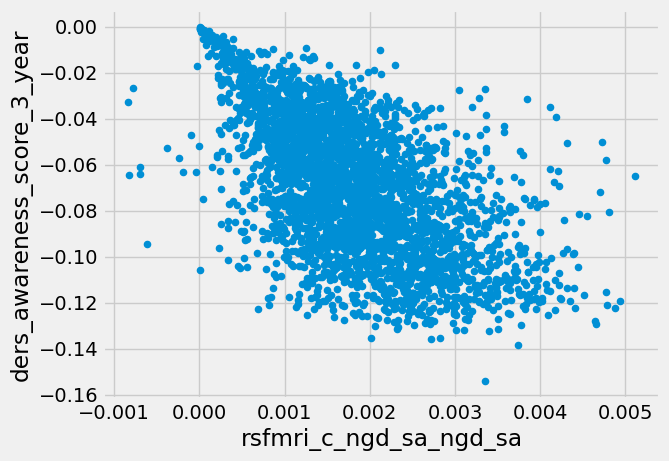

In [205]:
rs_train_val.plot.scatter(x='rsfmri_c_ngd_sa_ngd_sa', y='ders_awareness_score_3_year')

<Axes: xlabel='rsfmri_c_ngd_dt_ngd_dt', ylabel='ders_awareness_score_3_year'>

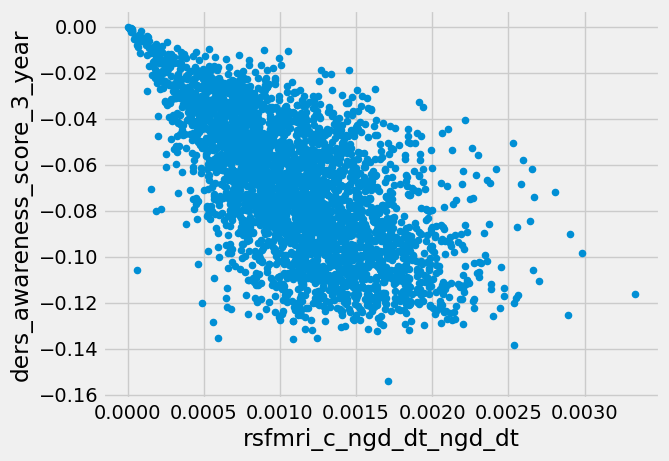

In [206]:
rs_train_val.plot.scatter(x='rsfmri_c_ngd_dt_ngd_dt', y='ders_awareness_score_3_year')

### Gridsearch Random Forest Hyperparameters

In [224]:
print('Grid searching hyperparameters...')
rf = RandomForestRegressor(n_jobs=-1, random_state=7799)
depth_steps = np.arange(14)[1:]
min_split_steps = np.arange(5)[2:]

param_grid = {
    'n_estimators': [500, 1000, 1500, 2000, 3000, 4000], 
    'max_depth': depth_steps, 
    'criterion': ['squared_error', 'friedman_mse'],
    'min_samples_split': [2, 4, 5, 10],
    'max_features': [0.5, 0.75, 1],
    'max_samples': [0.5, 0.75, 1],
}
cv_folds = 5
grid = GridSearchCV(rf, param_grid, cv=cv_folds, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1, verbose=4)
X_train_val = rs_train_val.drop(cols_stry, axis=1)
Y_train_val = rs_train_val['ders_awareness_score_3_year']
grid.fit(X_train_val, Y_train_val)

Grid searching hyperparameters...
Fitting 5 folds for each of 5616 candidates, totalling 28080 fits


KeyboardInterrupt: 

In [221]:
cols_stry

['src_subject_id',
 'eventname',
 'ders_awareness_score_3_year',
 'ders_awareness_score_4_year',
 'ders_clarity_score_3_year',
 'ders_clarity_score_4_year',
 'ders_goals_score_3_year',
 'ders_goals_score_4_year',
 'ders_impulse_score_3_year',
 'ders_impulse_score_4_year',
 'ders_nonaccept_score_3_year',
 'ders_nonaccept_score_4_year',
 'ders_strategies_score_3_year',
 'ders_strategies_score_4_year',
 'ders_total_score_3_year',
 'ders_total_score_4_year',
 'ders_awareness_delta_4yr3',
 'ders_clarity_delta_4yr3',
 'ders_goals_delta_4yr3',
 'ders_impulse_delta_4yr3',
 'ders_nonaccept_delta_4yr3',
 'ders_strategies_delta_4yr3',
 'ders_total_delta_4yr3']

In [217]:
# set y as 'pts_target', then remove 'pts_target' from feature df
if 'pts_target' in nba.columns:
    y_train = nba['pts_target']
    nba.drop('pts_target', axis=1, inplace=True)
X_train = nba 
############
## Create Model Processing Pipeline
###### Normalize feature and target variables to have a mean of 0 and std of 1
###### Random Forest Regressor
############
pipe = Pipeline(steps=
    [
        ('scaler', StandardScaler()),
        ('RF', RandomForestRegressor(random_state=979, n_jobs=-1)),
    ]
)

#############
## Dictionary for range of hyperparameters to be grid searched and tuned below
#############
parameters = {
    'RF__n_estimators': [500, 750, 1000],
    'RF__criterion': ['squared_error', 'friedman_mse'],
    'RF__max_depth': [2, 5, 8],
    'RF__max_samples': [.66, .75, 1],
}

#############
## Grid Search Cross Validation (5-fold)
#############
cv_f = 5
gs = GridSearchCV(pipe, param_grid=parameters, cv=cv_f, scoring='neg_root_mean_squared_error', return_train_score=True)
# Fit Model and tune hyperparameters with 5-fold grid search
gs.fit(X_train, y_train)
# show optimal hyperparameters
print(gs.best_params_)
############################

2.61

In [220]:
np.log(105)

4.653960350157523

In [214]:
depth_steps

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

### Delta Emotion Regulation Target

In [106]:
er_nms = [c for c in rs.columns if '_year' in c or '4yr3' in c]
cols_stry = ['src_subject_id', 'eventname'] + er_nms
rs_train, rs_val = train_test_split(rs_train_val, train_size = 0.8, random_state=7799)
X_train = rs_train.drop(cols_stry, axis=1)
Y_train = rs_train['ders_awareness_delta_4yr3']
print(X_train.shape)
print(Y_train.shape)

(2610, 82)
(2610,)


In [107]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [108]:
X_val = rs_val.drop(cols_stry, axis=1)
Y_val = rs_val['ders_awareness_delta_4yr3']
y_pred = rf.predict(X_val)

In [109]:

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_val, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_val, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(Y_val, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(Y_val, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(Y_val, y_pred))
print('Max Error:', metrics.max_error(Y_val, y_pred))
# print('Mean Squared Log Error:', metrics.mean_squared_log_error(Y_val, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(Y_val, y_pred))
print('R^2:', metrics.r2_score(Y_val, y_pred))
# print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(Y_val, y_pred))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(Y_val, y_pred))

Mean Absolute Error (MAE): 0.016693634628559707
Mean Squared Error (MSE): 0.0005235140530565183
Root Mean Squared Error (RMSE): 0.02288042947709938
Mean Absolute Percentage Error (MAPE): 2765695340777.492
Explained Variance Score: -0.013909329441217588
Max Error: 0.09122616327886825
Median Absolute Error: 0.012096419428342164
R^2: -0.014686585197869473


In [129]:

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_val, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_val, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(Y_val, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(Y_val, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(Y_val, y_pred))
print('Max Error:', metrics.max_error(Y_val, y_pred))
# print('Mean Squared Log Error:', metrics.mean_squared_log_error(Y_val, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(Y_val, y_pred))
print('R^2:', metrics.r2_score(Y_val, y_pred))
# print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(Y_val, y_pred))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(Y_val, y_pred))

Mean Absolute Error (MAE): 0.04921899312727551
Mean Squared Error (MSE): 0.004715939522060205
Root Mean Squared Error (RMSE): 0.06867269852030139
Mean Absolute Percentage Error (MAPE): 8236668404037.813
Explained Variance Score: -0.002265822854511157
Max Error: 0.2758943715742463
Median Absolute Error: 0.035058043940292674
R^2: -0.00344375415574949


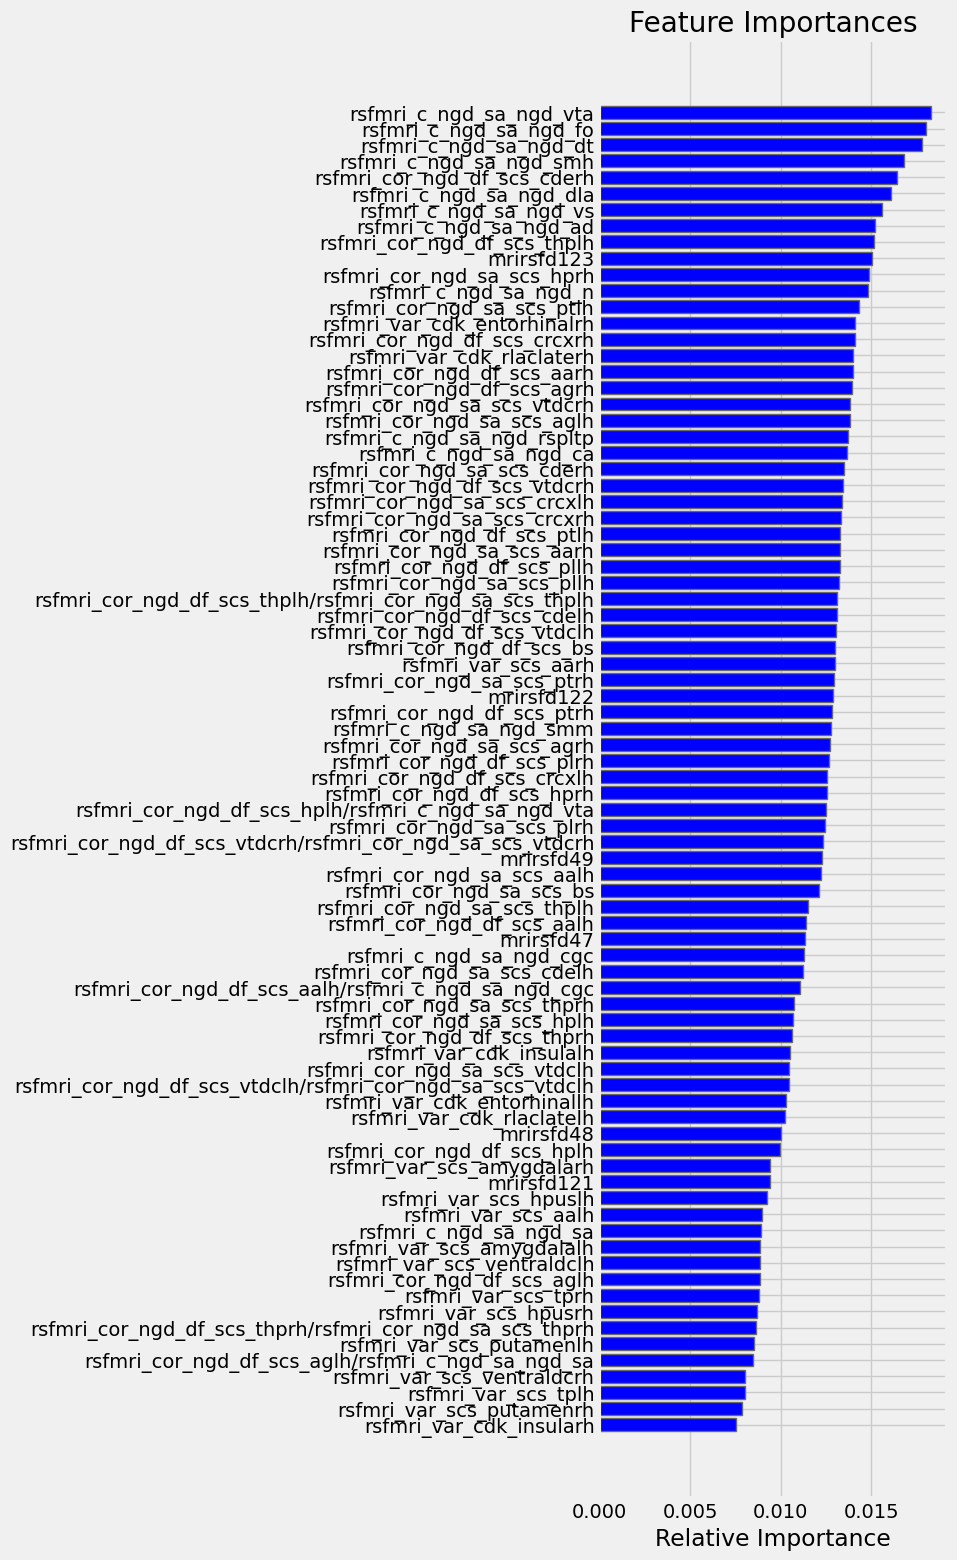

In [110]:
plt.figure(figsize=(4, 18))
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

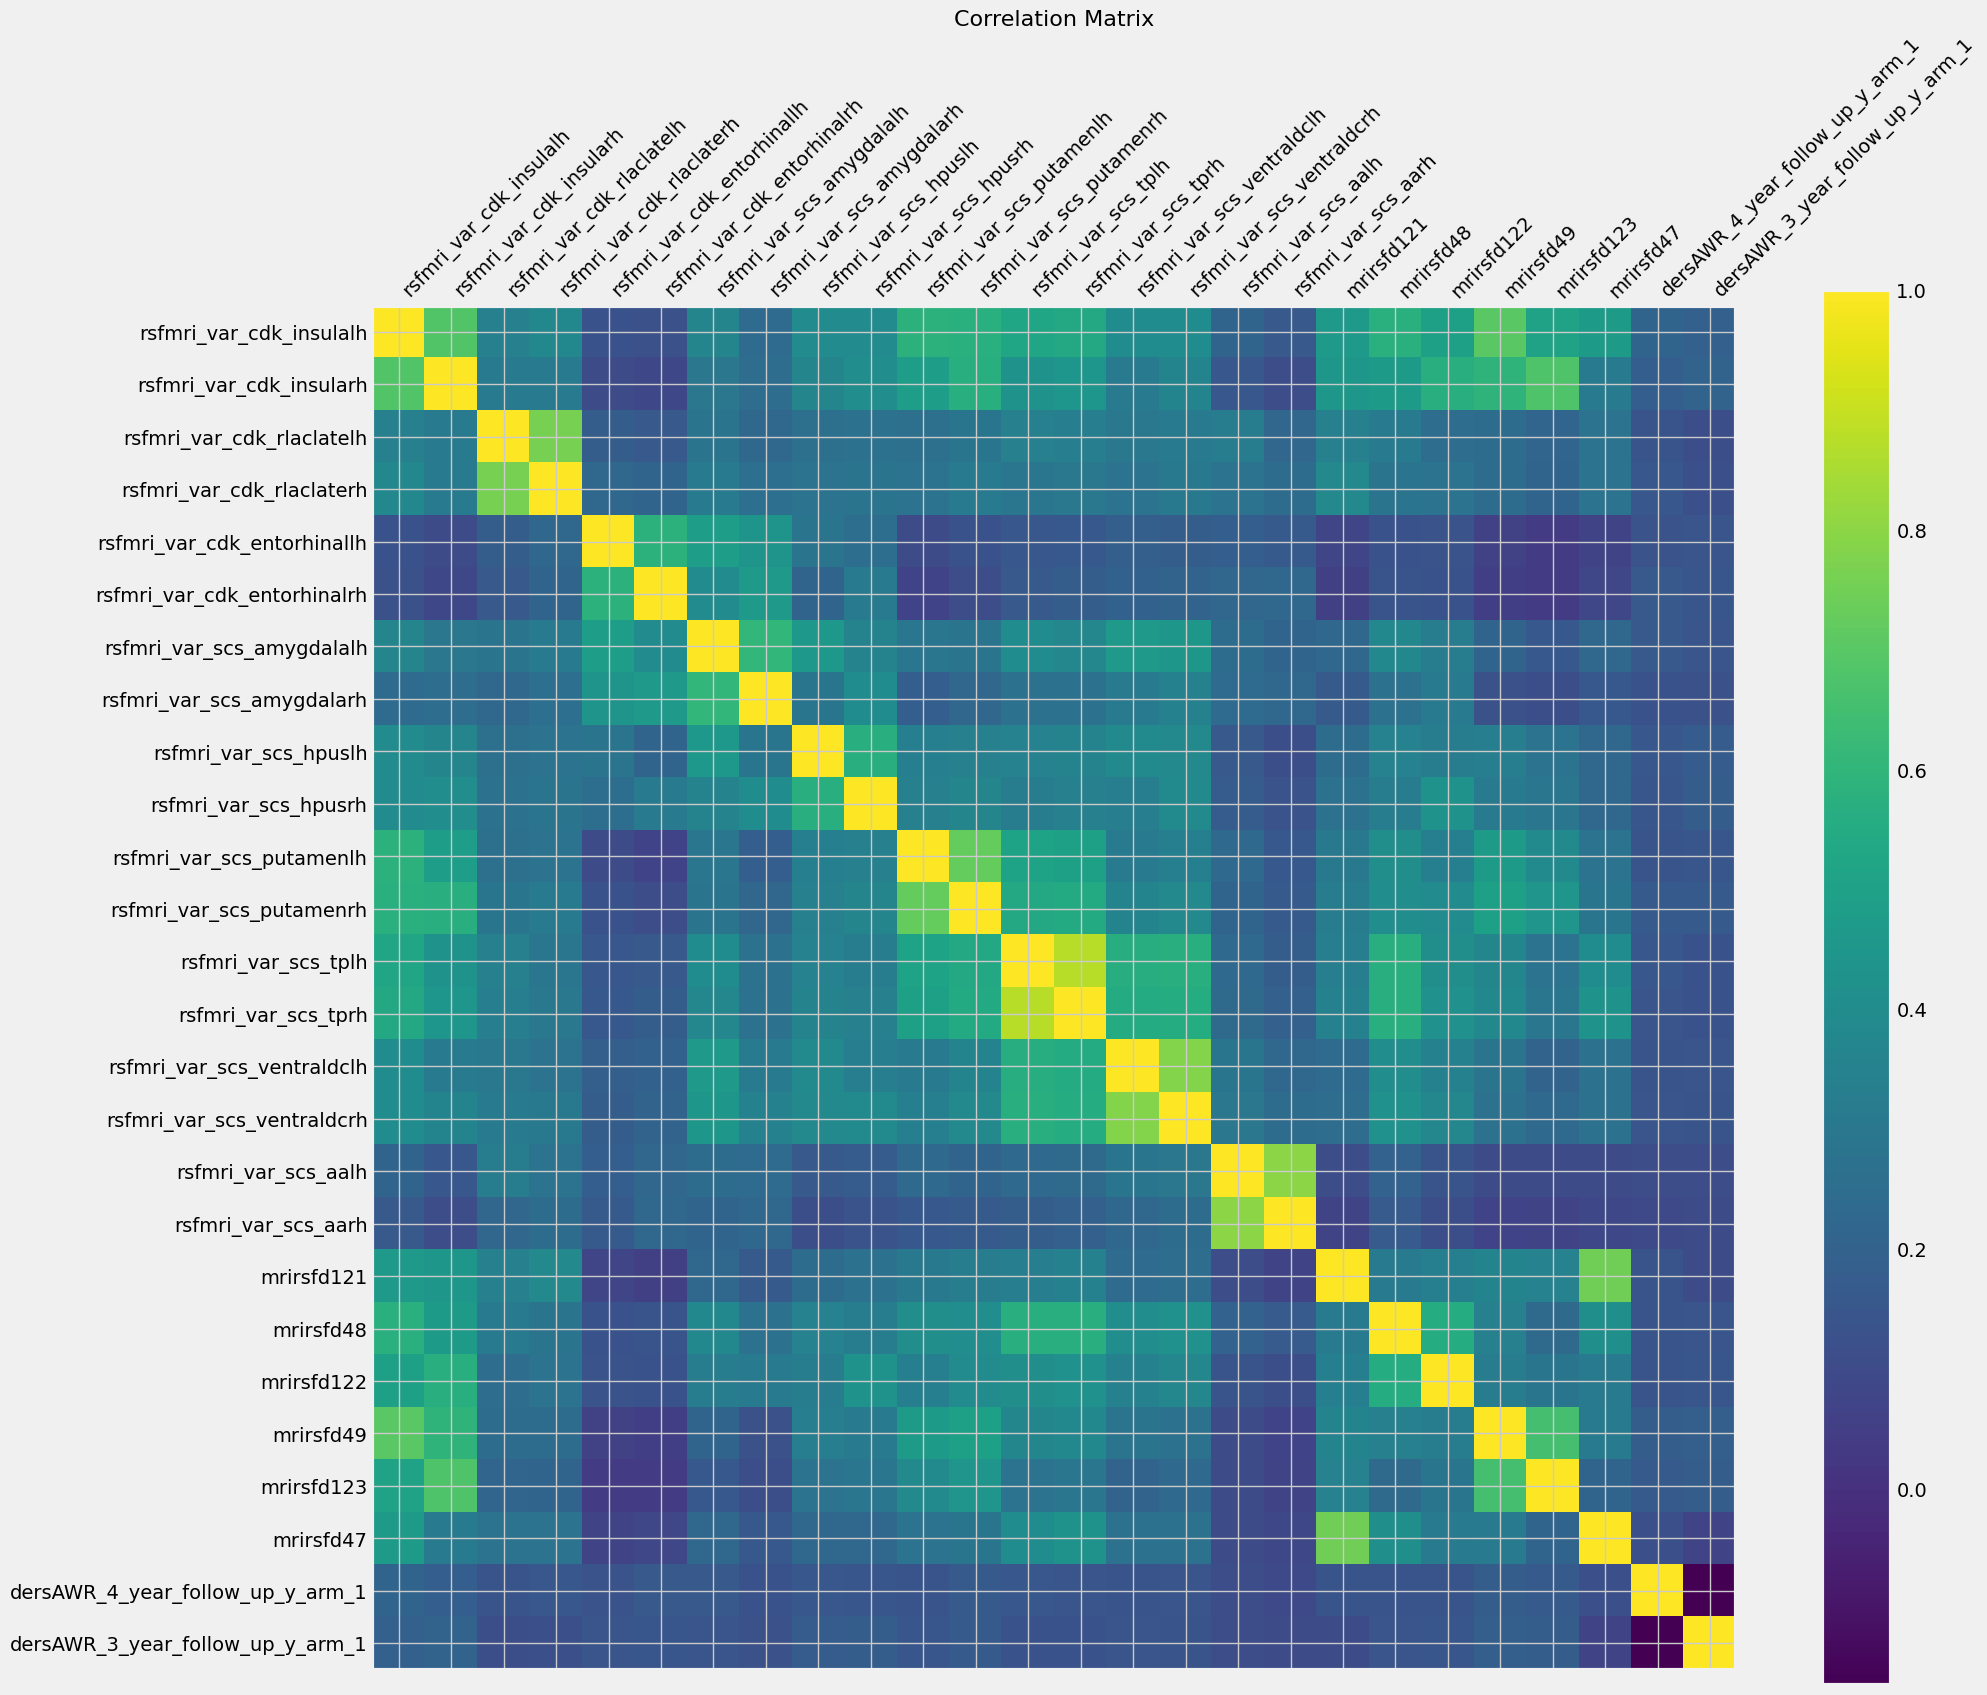


Correlation with 3rd year Awareness Subscale DERS:



dersAWR_3_year_follow_up_y_arm_1    1.000000
rsfmri_var_cdk_insularh             0.205336
rsfmri_var_cdk_insulalh             0.190636
mrirsfd49                           0.190505
mrirsfd123                          0.180968
rsfmri_var_scs_hpusrh               0.178243
rsfmri_var_scs_hpuslh               0.173442
rsfmri_var_scs_putamenrh            0.165491
rsfmri_var_scs_putamenlh            0.148920
mrirsfd122                          0.146315
rsfmri_var_cdk_entorhinalrh         0.145109
rsfmri_var_cdk_entorhinallh         0.142998
mrirsfd48                           0.142041
rsfmri_var_scs_ventraldclh          0.141041
rsfmri_var_scs_amygdalalh           0.140788
rsfmri_var_scs_ventraldcrh          0.136104
rsfmri_var_scs_tprh                 0.129416
rsfmri_var_scs_tplh                 0.128723
rsfmri_var_scs_amygdalarh           0.124087
rsfmri_var_cdk_rlaclaterh           0.120381
rsfmri_var_cdk_rlaclatelh           0.117617
rsfmri_var_scs_aalh                 0.111728
rsfmri_var

In [60]:
tmp_cols = rs_var_nm + ['dersAWR_4_year_follow_up_y_arm_1', 'dersAWR_3_year_follow_up_y_arm_1']
corr_matrix = rs[tmp_cols].corr()#

f = plt.figure(figsize=(22, 18))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14, rotation=45, ha = 'left')
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
col_bar = plt.colorbar()
col_bar.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()
print('\nCorrelation with 3rd year Awareness Subscale DERS:\n')
corr_matrix.sort_values('dersAWR_3_year_follow_up_y_arm_1', ascending=False)['dersAWR_3_year_follow_up_y_arm_1']

In [ ]:
rf = Class_Fit(clf = RandomForestRegressor)
param_grid = {'criterion' : ['squared_error', 'poisson'], 'max_depth' : [3, 5, 8]}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

In [ ]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 2, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])